
# Travel Package Purchase Prediction

## Context:
A tourism company "Visit with us" wants to enable and establish a viable business model to expand the customer base by introducing a new package "Wellness Tourism Package" that will allow a traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

Company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient in comparison with previous year when customers were contacted at random without looking at the available information.

## Objective:

Aanalyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team, build a model to predict the potential customer who is more likely to purchase the newly introduced travel package.

## Data:

Tourism.xlsx file contains the following information:

**Customer details:**

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

**Customer interaction data:**

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

# 1. Loading Python packages and data

In [1]:
import warnings

warnings.filterwarnings("ignore")
%load_ext nb_black

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

<IPython.core.display.Javascript object>

In [2]:
# Import the dataset
data_backup = pd.read_excel("Tourism.xlsx", sheet_name="Tourism")

<IPython.core.display.Javascript object>

In [3]:
# Making a copy of the original dataset
data = data_backup.copy()

<IPython.core.display.Javascript object>

# 2. Data overview
(Observations at the end of the section)

In [4]:
# Displaying sample rows
data.sample(5)

CustomerID  ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
3995      203995          0  36.0  Self Enquiry         1              7.0   
3103      203103          0  29.0  Self Enquiry         3             12.0   
2448      202448          0  28.0  Self Enquiry         1              9.0   
2584      202584          1  33.0  Self Enquiry         1             16.0   
2268      202268          1  33.0  Self Enquiry         1             31.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
3995  Small Business    Male                       2                5.0   
3103  Small Business    Male                       4                4.0   
2448  Small Business    Male                       3                4.0   
2584  Small Business  Female                       3                4.0   
2268  Small Business    Male                       2                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
3995          Basic                    3.0     Unmarried            3.0   
3103         Deluxe                    3.0     Unmarried            3.0   
2448          Basic                    4.0      Divorced            2.0   
2584          Basic                    5.0     Unmarried            2.0   
2268          Basic                    4.0        Single            5.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
3995         0                       4       1                       1.0   
3103         0                       3       1                       1.0   
2448         0                       5       1                       1.0   
2584         0                       4       1                       2.0   
2268         1                       4       1                       0.0   

     Designation  MonthlyIncome  
3995   Executive        21537.0  
3103     Manager        23586.0  
2448   Executive        22146.0  
2584   Executive        22878.0  
2268   Executive        17313.0

<IPython.core.display.Javascript object>

In [5]:
# Displaying data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

In [6]:
# Basic statistics of numerical variables
data.describe().T

count           mean          std       min  \
CustomerID                4888.0  202443.500000  1411.188388  200000.0   
ProdTaken                 4888.0       0.188216     0.390925       0.0   
Age                       4662.0      37.622265     9.316387      18.0   
CityTier                  4888.0       1.654255     0.916583       1.0   
DurationOfPitch           4637.0      15.490835     8.519643       5.0   
NumberOfPersonVisiting    4888.0       2.905074     0.724891       1.0   
NumberOfFollowups         4843.0       3.708445     1.002509       1.0   
PreferredPropertyStar     4862.0       3.581037     0.798009       3.0   
NumberOfTrips             4748.0       3.236521     1.849019       1.0   
Passport                  4888.0       0.290917     0.454232       0.0   
PitchSatisfactionScore    4888.0       3.078151     1.365792       1.0   
OwnCar                    4888.0       0.620295     0.485363       0.0   
NumberOfChildrenVisiting  4822.0       1.187267     0.857861       0.0   
MonthlyIncome             4655.0   23619.853491  5380.698361    1000.0   

                                25%       50%        75%       max  
CustomerID                201221.75  202443.5  203665.25  204887.0  
ProdTaken                      0.00       0.0       0.00       1.0  
Age                           31.00      36.0      44.00      61.0  
CityTier                       1.00       1.0       3.00       3.0  
DurationOfPitch                9.00      13.0      20.00     127.0  
NumberOfPersonVisiting         2.00       3.0       3.00       5.0  
NumberOfFollowups              3.00       4.0       4.00       6.0  
PreferredPropertyStar          3.00       3.0       4.00       5.0  
NumberOfTrips                  2.00       3.0       4.00      22.0  
Passport                       0.00       0.0       1.00       1.0  
PitchSatisfactionScore         2.00       3.0       4.00       5.0  
OwnCar                         0.00       1.0       1.00       1.0  
NumberOfChildrenVisiting       1.00       1.0       2.00       3.0  
MonthlyIncome              20346.00   22347.0   25571.00   98678.0

<IPython.core.display.Javascript object>

In [7]:
# Printing variable names
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<IPython.core.display.Javascript object>

In [8]:
# Overview of the categorical data
data_columns = data[
    [
        "ProdTaken",
        "TypeofContact",
        "CityTier",
        "DurationOfPitch",
        "Occupation",
        "Gender",
        "NumberOfPersonVisiting",
        "NumberOfFollowups",
        "ProductPitched",
        "PreferredPropertyStar",
        "MaritalStatus",
        "NumberOfTrips",
        "Passport",
        "PitchSatisfactionScore",
        "OwnCar",
        "NumberOfChildrenVisiting",
        "Designation",
    ]
]
for column in data_columns:
    print(data[column].value_counts())
    print("-" * 50)

0    3968
1     920
Name: ProdTaken, dtype: int64
--------------------------------------------------
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------
9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
10.0     244
13.0     223
11.0     205
12.0     195
17.0     172
30.0      95
22.0      89
31.0      83
23.0      79
18.0      75
29.0      74
32.0      74
25.0      73
21.0      73
26.0      72
27.0      72
24.0      70
35.0      66
20.0      65
28.0      61
19.0      57
33.0      57
34.0      50
36.0      44
5.0        6
127.0      1
126.0      1
Name: DurationOfPitch, dtype: int64
--------------------------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
----

<IPython.core.display.Javascript object>

In [9]:
# Missing data summary
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

**Observations:**

* There are 20 columns and 4888 rows
* Data contains both numerical and categorical variables, some categorical data is in numerical format
* Numeriacal variables 'Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome' have missing values of various count
* Target variable 'ProdTaken' has no missing values
* Variable 'Gender' has "Fe Male" entries that need correction to "Female"
* 'CustomerID' does not bring any significant information and can be dropped out
* Customer age varies 18-61 with mean of 37, Customer income from 1000 to 99000 with mean 24000 - data is highly skewed
* 'DurationOfPitch' has two entries with number unusually high, might be considered as outliers, needs further look
* 'NumberOfTrips' has only one customer fro 19-21 days of trips, might be considered as outliers, needs further look

## Initial data pre-processing for EDA

In [10]:
# Dropping out unnecessary 'CustomerID' column
data.drop(["CustomerID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [11]:
# Correcting 'Gender' entries
data.Gender = data.Gender.replace("Fe Male", "Female")
# Checking result
data.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

# 2. Exploratory Data Analysis

## 2.1 Univariate analysis
### User-defined visualization functions

In [12]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot1(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [13]:
# Creating a function to visualize boxplot and histogram for any input numerical variable along the same scale
def histogram_boxplot2(data, predictor, target, figsize=(7, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=False,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.5, 0.5)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=ax_box2,
        showmeans=True,
        palette="gist_rainbow",
    )  # boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data=data,
        x=predictor,
        kde=True,
        hue=target,
        ax=ax_hist2,
        bins=bins,
        palette="winter",
    ) if bins else sns.histplot(
        data=data, x=predictor, kde=True, hue=target, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[predictor].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[predictor].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [14]:
# Defining a function to display a distribution plot separately for each target class along with boxplots with and without outliers
def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Numerical

#### Age

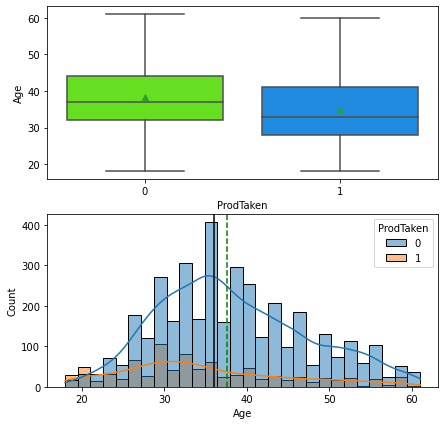

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot2(data, "Age", "ProdTaken")

Customer age varies from 18 to 61yo, normally distributed around 38. Customers purchasing the package are slightly younger in age with mean around 33 and IQR 28-41. Whereas customers not interested in the package tend to have IQR 32-44 (mean of 38). No outliers detected

#### Monthly Income

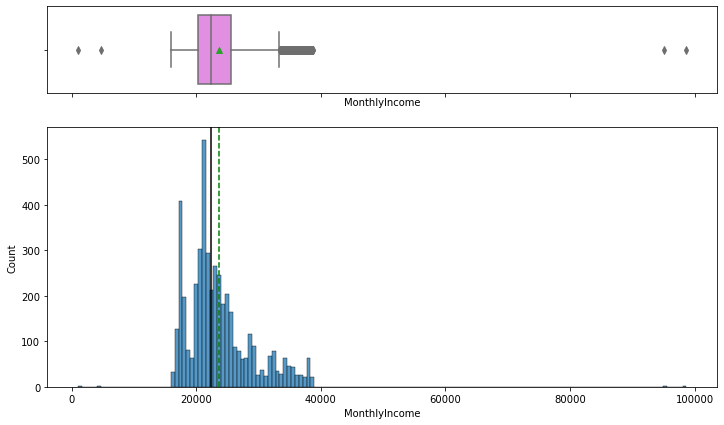

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot1(data, "MonthlyIncome")

There are obvious outliers over 50000 and less than 10000 that need treatment

In [17]:
# Displaying outlier values
data[data["MonthlyIncome"] > 50000]

ProdTaken   Age TypeofContact  CityTier  DurationOfPitch Occupation  \
38            0  36.0  Self Enquiry         1             11.0   Salaried   
2482          0  37.0  Self Enquiry         1             12.0   Salaried   

      Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
38    Female                       2                4.0          Basic   
2482  Female                       3                5.0          Basic   

      PreferredPropertyStar MaritalStatus  NumberOfTrips  Passport  \
38                      NaN      Divorced            1.0         1   
2482                    5.0      Divorced            2.0         1   

      PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting Designation  \
38                         2       1                       0.0   Executive   
2482                       2       1                       1.0   Executive   

      MonthlyIncome  
38          95000.0  
2482        98678.0

<IPython.core.display.Javascript object>

In [18]:
# Displaying outlier values
data[data["MonthlyIncome"] < 10000]

ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
142           0  38.0  Self Enquiry         1              9.0   
2586          0  39.0  Self Enquiry         1             10.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
142   Large Business  Female                       2                3.0   
2586  Large Business  Female                       3                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
142          Deluxe                    3.0        Single            4.0   
2586         Deluxe                    3.0        Single            5.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
142          1                       5       0                       0.0   
2586         1                       5       0                       1.0   

     Designation  MonthlyIncome  
142      Manager         1000.0  
2586     Manager         4678.0

<IPython.core.display.Javascript object>

In [19]:
data["MonthlyIncome"][data["MonthlyIncome"] > 50000] = np.nan
data["MonthlyIncome"][data["MonthlyIncome"] < 10000] = np.nan

<IPython.core.display.Javascript object>

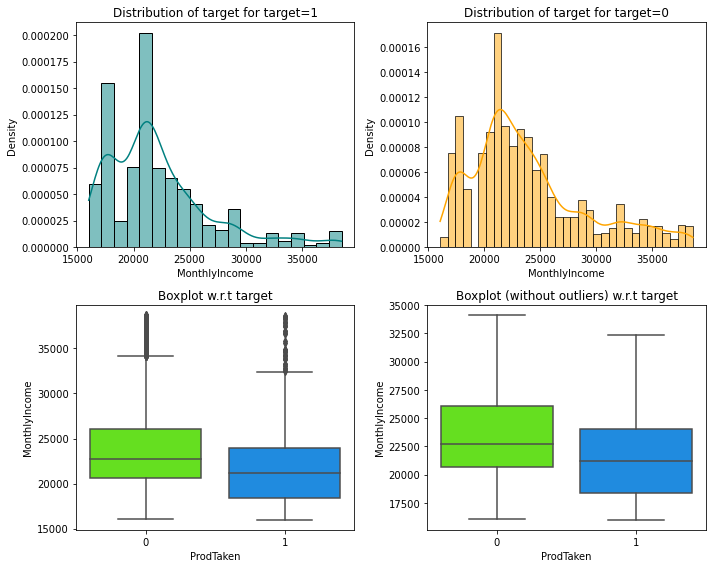

<IPython.core.display.Javascript object>

In [20]:
distribution_plot_wrt_target(data, "MonthlyIncome", "ProdTaken")

* After removing obvious outliers, variable values outside IQR do not require futher outlier treatment
* Income of customers interested in the package also shows slight shift towards lower values with mean around 22 thousand
* Variable has a skewed distribution

#### Duration of Pitch

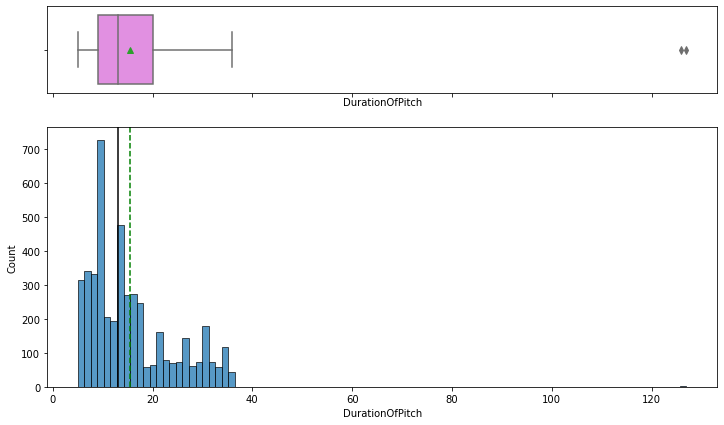

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot1(data, "DurationOfPitch")

There are obvious outliers over 100 that need treatment

In [22]:
# Displaying outlier values
data[data["DurationOfPitch"] > 100]

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch Occupation  \
1434          0   NaN  Company Invited         3            126.0   Salaried   
3878          0  53.0  Company Invited         3            127.0   Salaried   

     Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
1434   Male                       2                3.0          Basic   
3878   Male                       3                4.0          Basic   

      PreferredPropertyStar MaritalStatus  NumberOfTrips  Passport  \
1434                    3.0       Married            3.0         0   
3878                    3.0       Married            4.0         0   

      PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting Designation  \
1434                       1       1                       1.0   Executive   
3878                       1       1                       2.0   Executive   

      MonthlyIncome  
1434        18482.0  
3878        22160.0

<IPython.core.display.Javascript object>

In [23]:
data["DurationOfPitch"][data["DurationOfPitch"] > 100] = np.nan

<IPython.core.display.Javascript object>

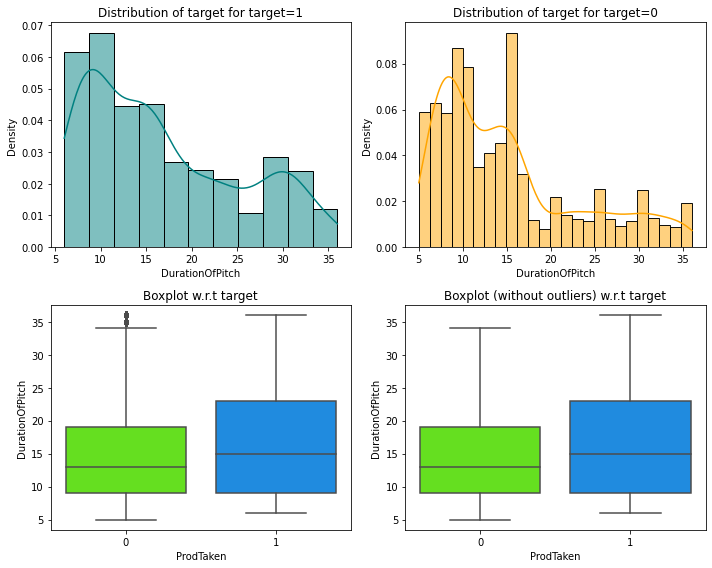

<IPython.core.display.Javascript object>

In [24]:
distribution_plot_wrt_target(data, "DurationOfPitch", "ProdTaken")

* After removing entries over 100, no further outlier treatment is required
* Customers that ended purchasing a package have longer duration of pitch on average and wider distribution IQR ranging from 10 to 23. Duration of pitch 19-24 will most likely end up with the purchase
* Duration of Pitch has a skewed distribution, median will be applied for imputation

### Categorical

In [25]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 5, 4))
    else:
        plt.figure(figsize=(n + 5, 4))

    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 4))

    ax1 = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
        ax=ax[0],
    )
    #     plt.xticks(rotation=90, fontsize=10)

    for p in ax1.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax1.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    ax2 = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
        ax=ax[1],
        hue="ProdTaken",
    )

    for p in ax2.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax2.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [26]:
# function to plot stacked bar chart
# Stacked bar chart of categorical parameter for target variable, target=0 and target=1

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 3, 4))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

#### Gender

<Figure size 504x288 with 0 Axes>

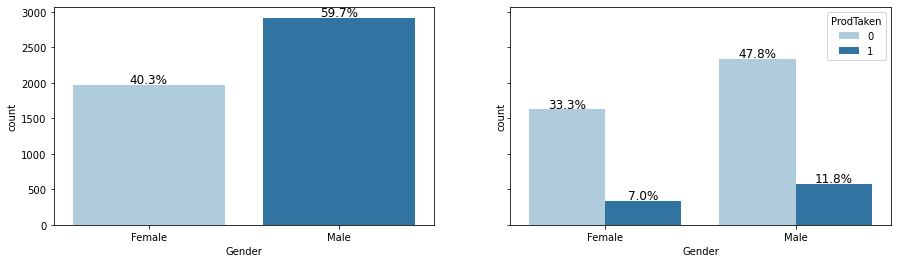

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data, "Gender", perc=True)

There is ~60/40 Male/Female customer ratio, number of male customers purchasing the package is higher

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


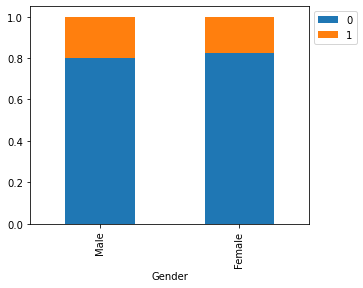

<IPython.core.display.Javascript object>

In [28]:
stacked_barplot(data, "Gender", "ProdTaken")

Males are as likely to purchase the package as females ratio wise

#### Marital status

<Figure size 648x288 with 0 Axes>

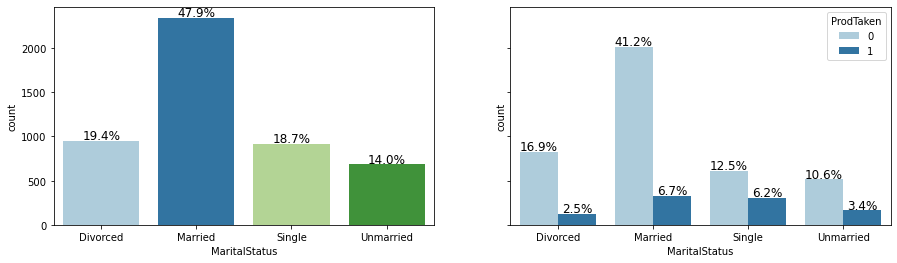

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(data, "MaritalStatus", perc=True)

Majority of cusotmers are married(48%), Divorced and Single display very close numbers of ~19% each, unmarried customers are 14% of the total customer base
Single and Married customer numbers purchasing the package are twice the number of other categories

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


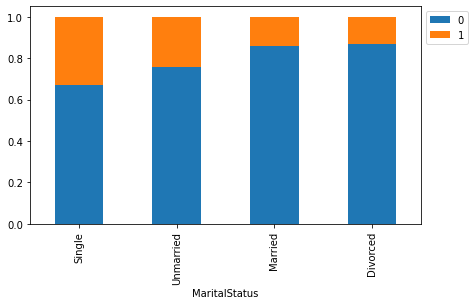

<IPython.core.display.Javascript object>

In [30]:
stacked_barplot(data, "MaritalStatus", "ProdTaken")

Single customers are the most interested in the package (almost 24%), followed by umarried group with 22% interested. Only around 10% of interest express married and divorced categories

#### Occupation

<Figure size 648x288 with 0 Axes>

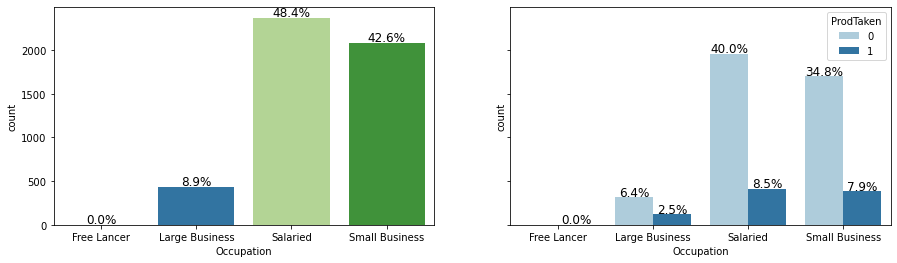

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(data, "Occupation", perc=True)

Majority of customers are Salaried emplyees (48%), followed by Small Business (43%) and Large Business (9%). Only two customers are freelancer (0% statistically)
Majority of customers purchasing the package are Salaried and Small Business employees (8% of total customer base each)

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


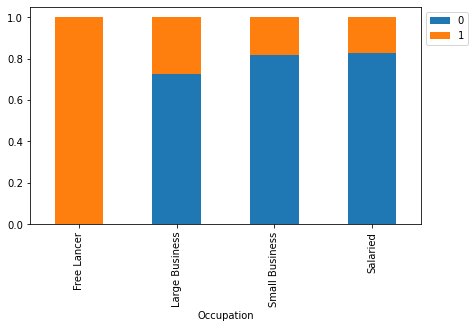

<IPython.core.display.Javascript object>

In [32]:
stacked_barplot(data, "Occupation", "ProdTaken")

Customers engaged in large business have have higher percentage rate of buing the package (~24%), Small business and salaried employees are equally probable.
Data suggests that freelance customers always purchase the package, however this being only 2 out of 4888 entris, statistically it is not enough to make any certain assumptions

#### Designation

<Figure size 720x288 with 0 Axes>

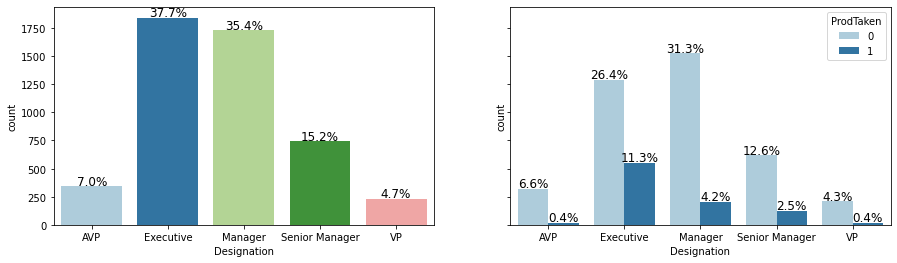

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(data, "Designation", perc=True)

Company customer base consists of mainly customers with managerial positions. Executive and Manger (38 and 35% respectively), Senior management 15%, AVP and VP are the least of 7 and 5% respectively. No individual contributor type employees are present in the database.
Majority of customers purchasing the package are from Executive group (11%), followed by Manager(4%) and Senior manager(2.5%) positions

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


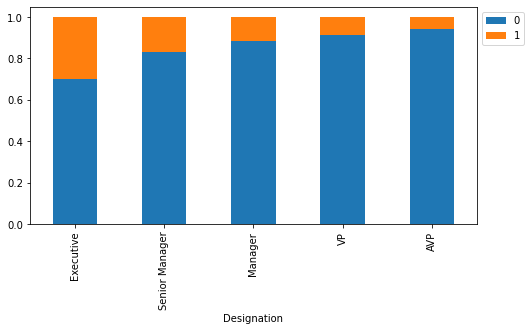

<IPython.core.display.Javascript object>

In [34]:
stacked_barplot(data, "Designation", "ProdTaken")

30% of customers holding executive positions are interested in the package, 18% out of senior management, followed by 10% of managers and VP and least of AVP(5%)

#### Car owernership

<Figure size 504x288 with 0 Axes>

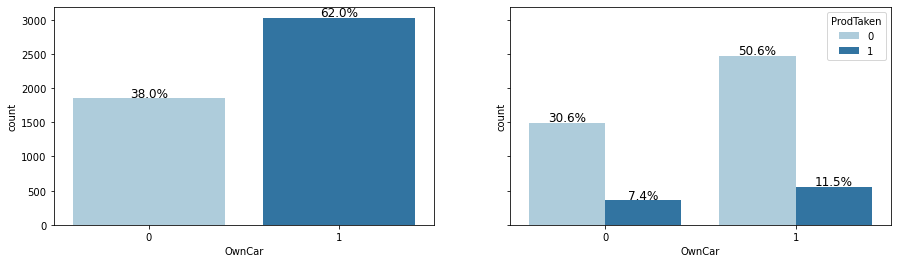

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(data, "OwnCar", perc=True)

Majority of customers own a car (62%)

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


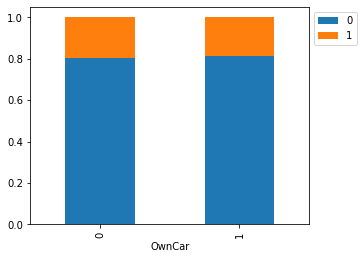

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(data, "OwnCar", "ProdTaken")

Car ownership does not affect the interest of customers in the package

#### Passport availability

<Figure size 504x288 with 0 Axes>

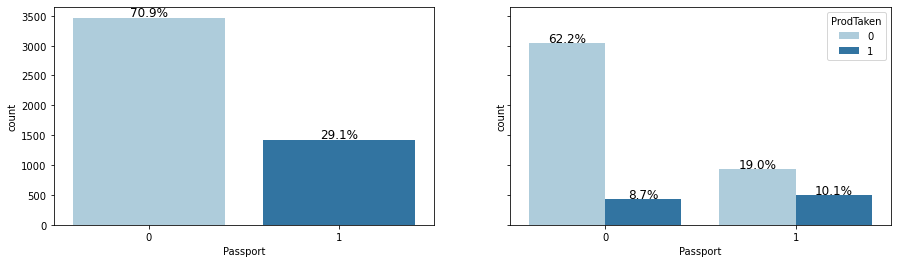

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(data, "Passport", perc=True)

71% of customers do not hold a passport

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


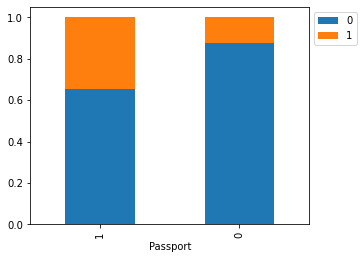

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(data, "Passport", "ProdTaken")

Customers holding a valid passport express more interest in the package (~35%) and only 10% of customers without a passport are interested

#### Number of trips

<Figure size 1224x288 with 0 Axes>

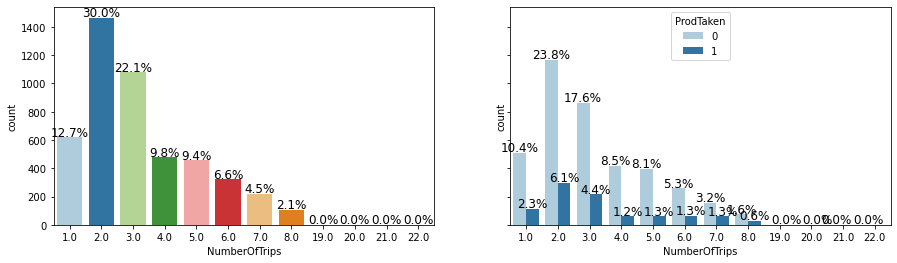

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(data, "NumberOfTrips", perc=True)

There are 4 data entries with unusually high numbers. We'll consider them as outliers and clip

<Figure size 936x288 with 0 Axes>

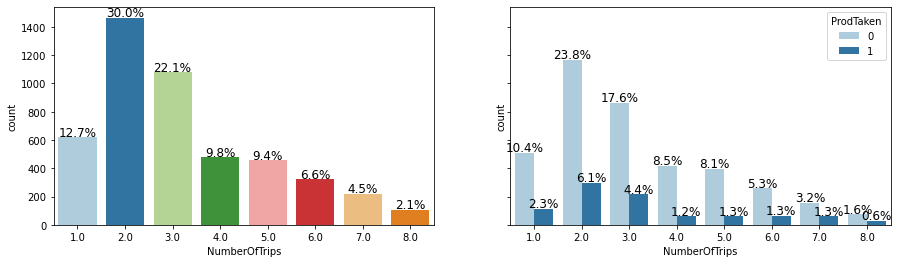

<IPython.core.display.Javascript object>

In [40]:
data["NumberOfTrips"][data["NumberOfTrips"] > 15] = np.nan
# Ending result
labeled_barplot(data, "NumberOfTrips", perc=True)

Mostly customers make 2-3 trips per year (30% and 22% respecively), once a year make 13% of customers, 4-5 times/year are 9-10% of customers, frequent travellers (6-8 times/year) make 13% of the total number
Customers making 2-3 trips per year are the majority bying the package as well

ProdTaken         0    1   All
NumberOfTrips                 
All            3838  906  4744
2.0            1165  299  1464
3.0             862  217  1079
1.0             508  112   620
6.0             258   64   322
5.0             396   62   458
7.0             156   62   218
4.0             417   61   478
8.0              76   29   105
------------------------------------------------------------------------------------------------------------------------


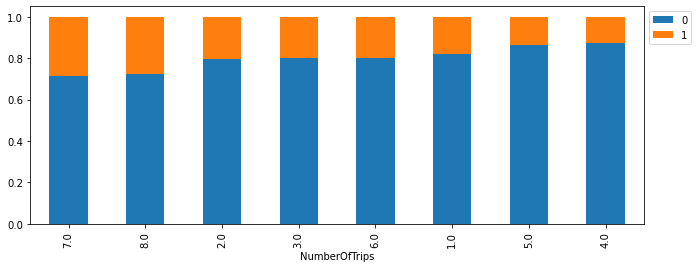

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(data, "NumberOfTrips", "ProdTaken")

Most frequent travellers (7-8 trips a year) have the highest ratio of inerested customers. Least interest express customers travelling 4-5 times/year

#### Number of persons visiting

<Figure size 720x288 with 0 Axes>

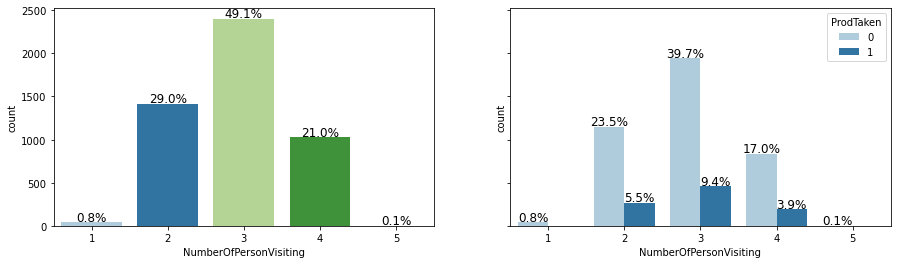

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(data, "NumberOfPersonVisiting", perc=True)

Customers prefer travelling in medium sized groups of 3 (majority, 49%), 2 (29%) and 4(21%). Solo travellers and large groups of 5 are of negiligible amount (less than 1%)
Customers travelling in groups of 3 are the majority that purchase the package

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


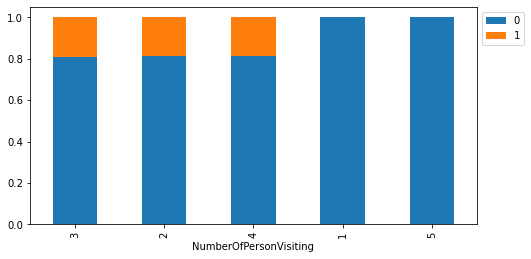

<IPython.core.display.Javascript object>

In [43]:
stacked_barplot(data, "NumberOfPersonVisiting", "ProdTaken")

According to data collected, single customers and customers in large groups do not purchase the package

####  Number of children visiting

<Figure size 648x288 with 0 Axes>

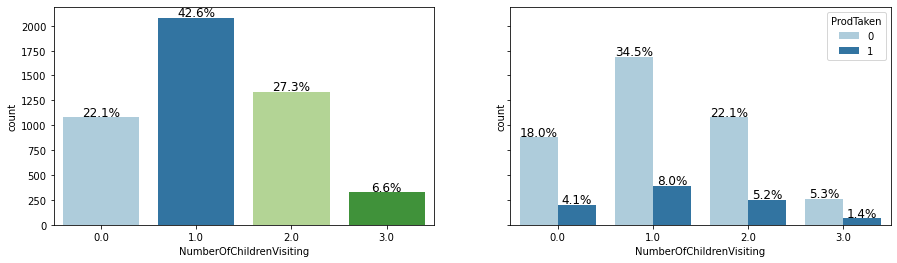

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(data, "NumberOfChildrenVisiting", perc=True)

Families with children travel more than cutomers without children. Families with 1 child are most frequent travellers, followed by families with 2 kids. Families with 3 kids travel the least, only 7% of the total customer number.
Families with 1 child comprise the majority of interested in the package

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3909  913  4822
1.0                       1688  392  2080
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


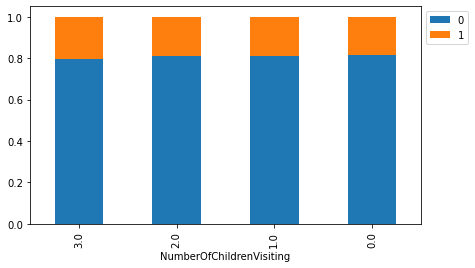

<IPython.core.display.Javascript object>

In [45]:
stacked_barplot(data, "NumberOfChildrenVisiting", "ProdTaken")

Number of children in the group has no impact on the interest in the package

### City tier

<Figure size 576x288 with 0 Axes>

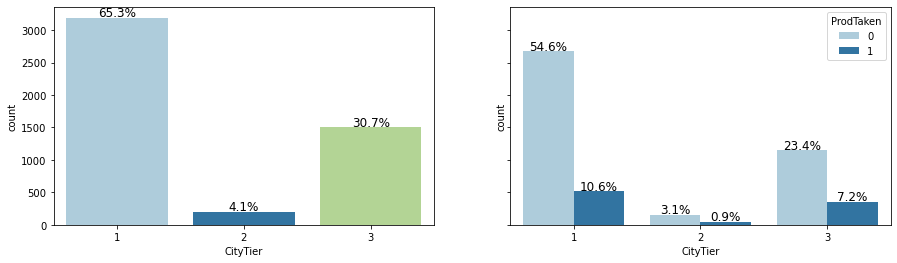

<IPython.core.display.Javascript object>

In [46]:
labeled_barplot(data, "CityTier", perc=True)

Customers prefer visiting more developed cities (65%) and underdeveloped (31%), cities with average ratings (facilities and living standard) are less attractive (4%).
Same applies to customers purchasing the package

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


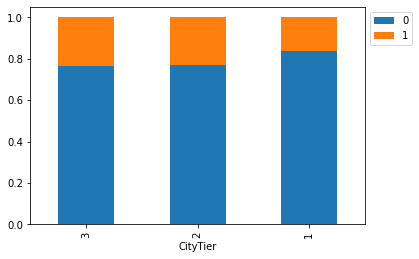

<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(data, "CityTier", "ProdTaken")

Customers preferring more developed cities are least likely to order the package

#### Preferred Property Star

<Figure size 576x288 with 0 Axes>

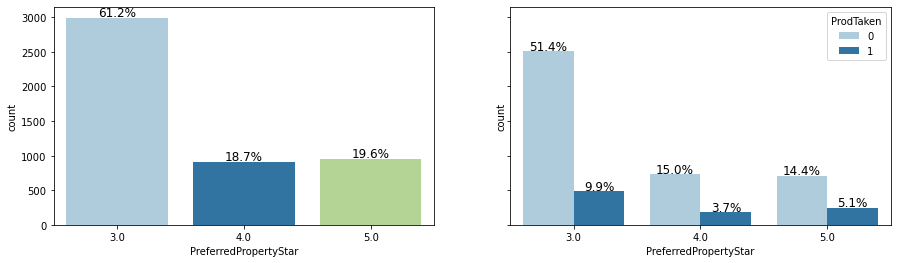

<IPython.core.display.Javascript object>

In [48]:
labeled_barplot(data, "PreferredPropertyStar", perc=True)

Mostly customers prefer 3 star hotels (61%), 4 and 5 star hotels are ~19% of customer base each
Customers purchasing the package have analogous distribution

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


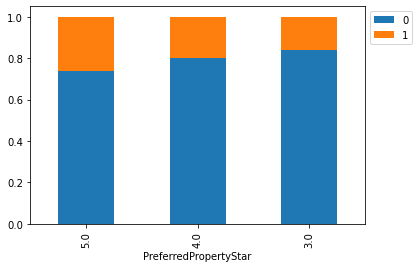

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(data, "PreferredPropertyStar", "ProdTaken")

Luxury travellers are more open to purchasing the package compared to 3star hotel dwellers

#### Type of contact

<Figure size 504x288 with 0 Axes>

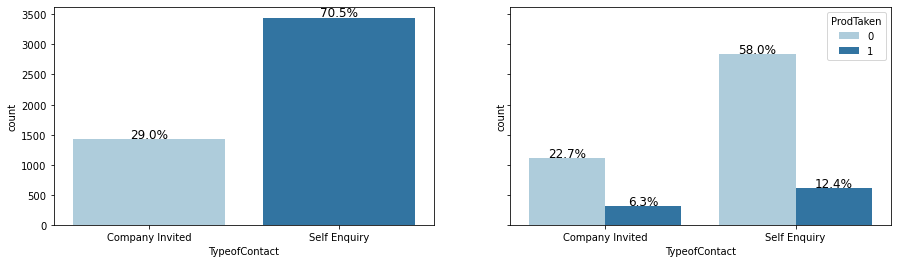

<IPython.core.display.Javascript object>

In [50]:
labeled_barplot(data, "TypeofContact", perc=True)

Customers are divided into 2 groups by a way of contact - Self Enquired (71%) and Company Invited(29%)

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


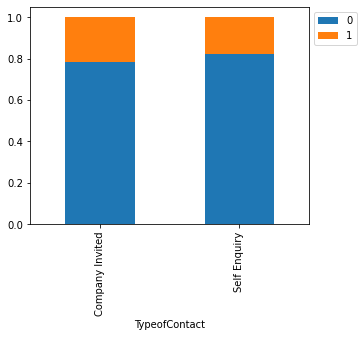

<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(data, "TypeofContact", "ProdTaken")

Type of contact does not affect the purchase outcome

#### Customer Interaction Data analysis

##### Number of follow-ups

<Figure size 792x288 with 0 Axes>

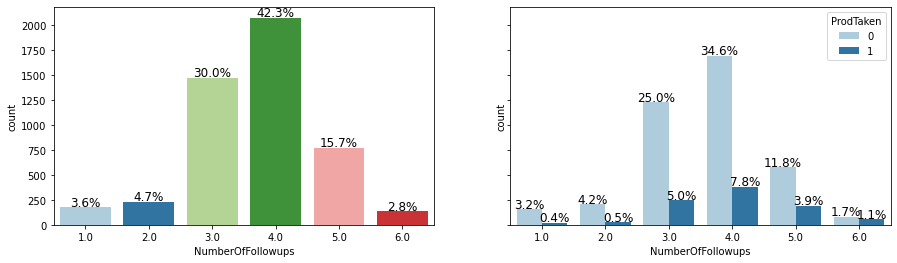

<IPython.core.display.Javascript object>

In [52]:
labeled_barplot(data, "NumberOfFollowups", perc=True)

On average customers are followed up 3-4 times, sometimes 5 times is required. Customers with less attention of 1-2 itmes and those required large number of follow-ups are a small portion of the customer base
Same distribution applies to customers having the new package

ProdTaken             0    1   All
NumberOfFollowups                 
All                3931  912  4843
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


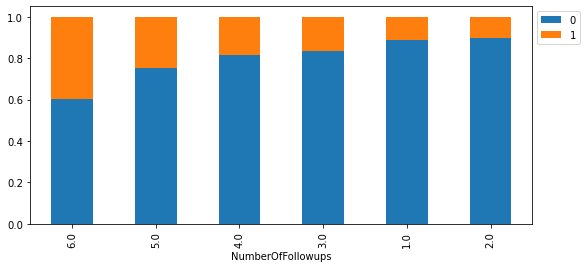

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(data, "NumberOfFollowups", "ProdTaken")

Higher number of follow-ups icrease chances of customer buying the package

##### Pitch satisfactio score

<Figure size 720x288 with 0 Axes>

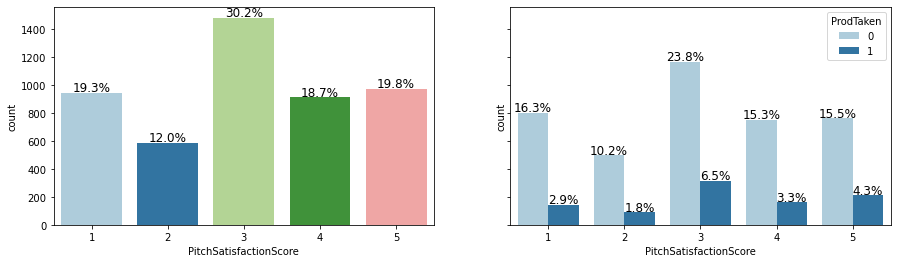

<IPython.core.display.Javascript object>

In [54]:
labeled_barplot(data, "PitchSatisfactionScore", perc=True)

Customer rate their agent satisfacton on 1-5 scale. Most frequent satisfaction rate is average, #3. However majorly customers are highly statisfied with services (ratings 4-5), ~39%. Unsatisfied customers nevertheless take a significant portion as well, 31% of the total customer base

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


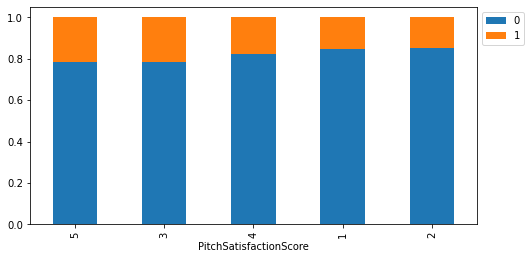

<IPython.core.display.Javascript object>

In [55]:
stacked_barplot(data, "PitchSatisfactionScore", "ProdTaken")

Customomer satisfaction with the service has direct impact on the probability of purchasing the package

## Mutlivariate Analysis

### Pair relations plots
(comments at the end)

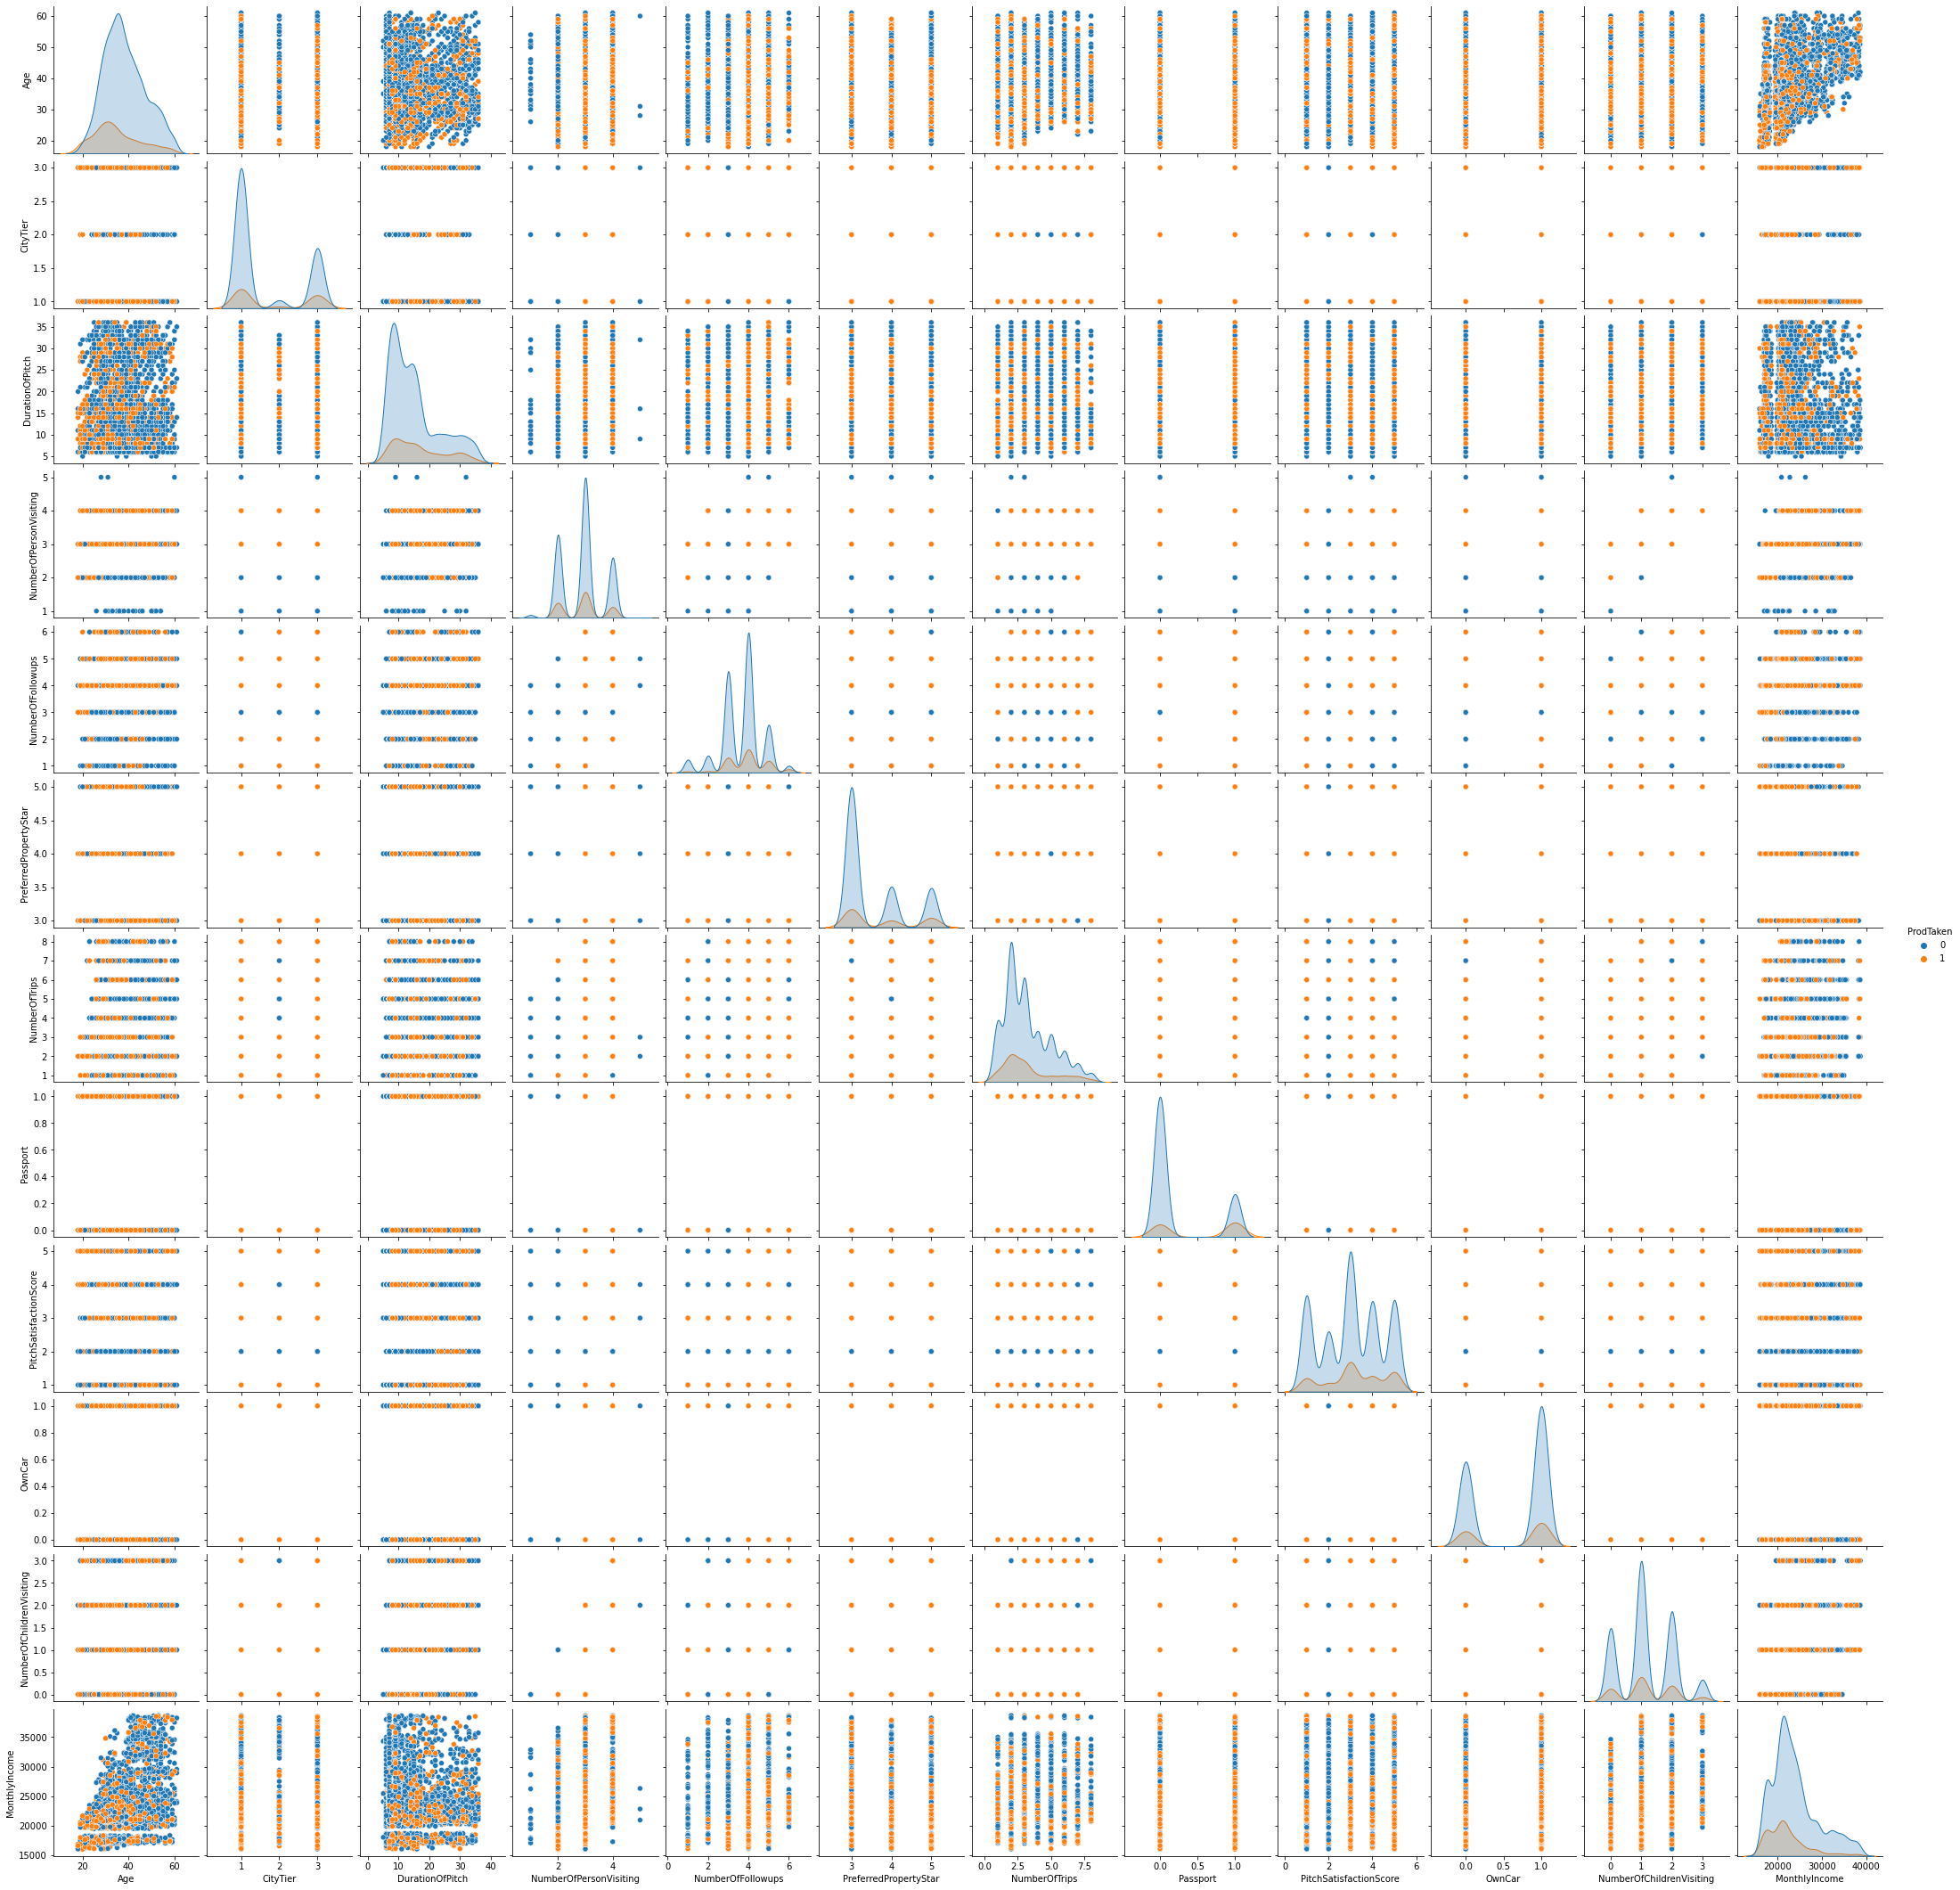

<IPython.core.display.Javascript object>

In [56]:
sns.pairplot(data=data, hue="ProdTaken", diag_kind="kde")
plt.show()

<AxesSubplot:>

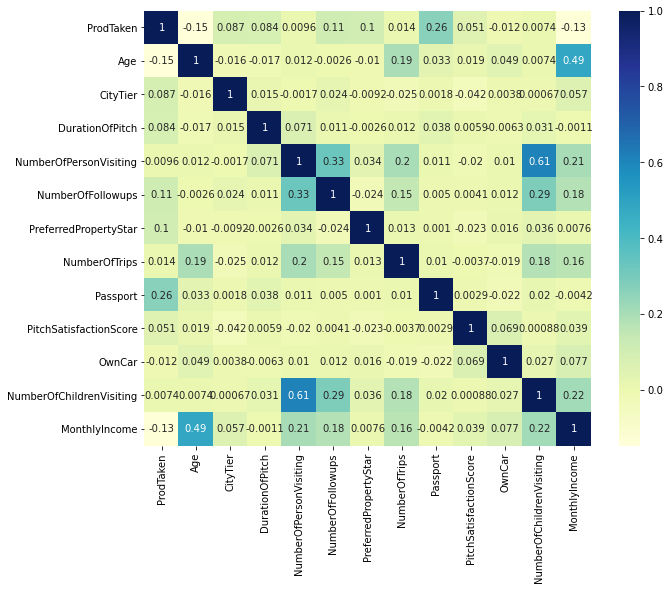

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(10, 8))  # setting the figure size
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


* Variables generally do not show high dependency
* Highest correlation (0.61) is between Number of persons visiting and number of children visiting, which is excpected
* Age and Monthy Income show correlation of 0.49
* All other variables have correlation less than 40%

### Age

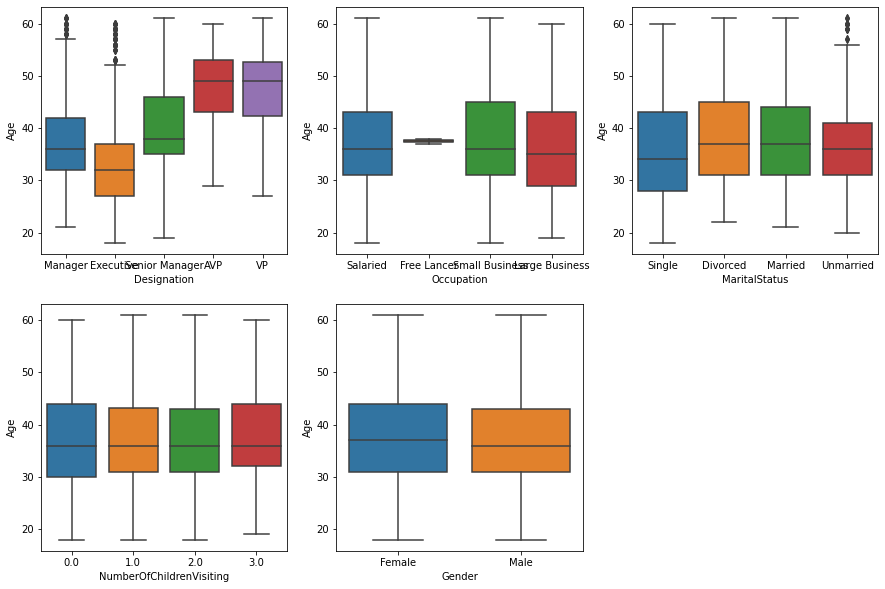

<IPython.core.display.Javascript object>

In [58]:
fig, axes = plt.subplots(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.boxplot(data=data, x="Designation", y="Age")
plt.subplot(2, 3, 2)
sns.boxplot(data=data, x="Occupation", y="Age")
plt.subplot(2, 3, 3)
sns.boxplot(data=data, x="MaritalStatus", y="Age")
plt.subplot(2, 3, 4)
sns.boxplot(data=data, x="NumberOfChildrenVisiting", y="Age")
plt.subplot(2, 3, 5)
sns.boxplot(data=data, x="Gender", y="Age")
plt.show()

* Age varies with Designation, Occupation and Marital Status
* No gender or number of children have dependency with age
* This information can be used for missing value imputation
* Customers holding VP and AVP positions tend to be older, youngest group is represented by the Executives
* There is a slight variation in IQR for various Occupation and Marital Status groups

### Monthly Income
(Comments to each plot are at the end of the section)

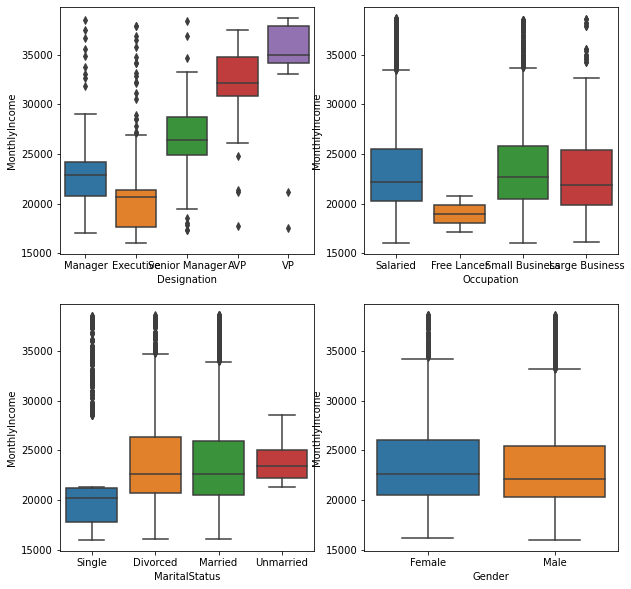

<IPython.core.display.Javascript object>

In [59]:
fig, axes = plt.subplots(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x="Designation", y="MonthlyIncome")
plt.subplot(2, 2, 2)
sns.boxplot(data=data, x="Occupation", y="MonthlyIncome")
plt.subplot(2, 2, 3)
sns.boxplot(data=data, x="MaritalStatus", y="MonthlyIncome")
plt.subplot(2, 2, 4)
sns.boxplot(data=data, x="Gender", y="MonthlyIncome")
plt.show()

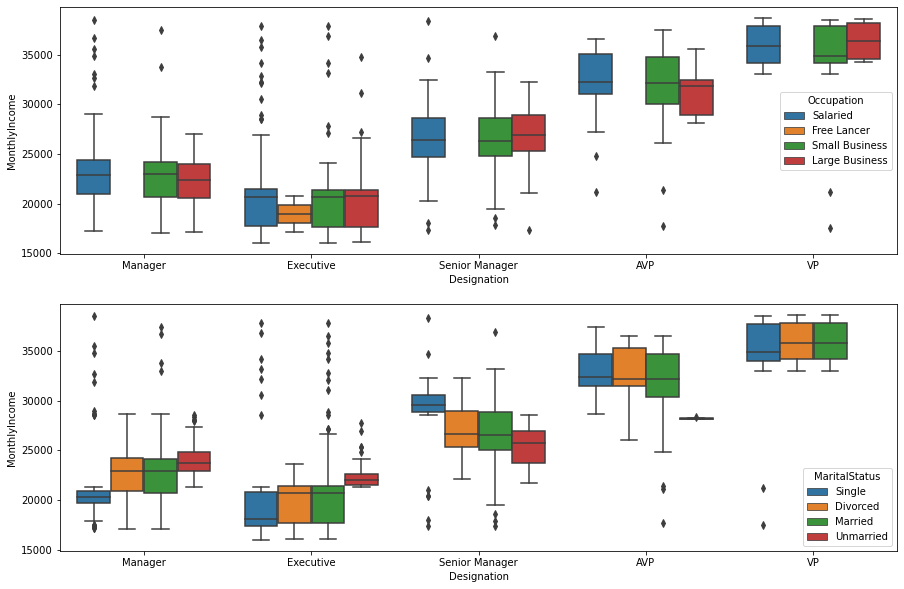

<IPython.core.display.Javascript object>

In [60]:
fig, axes = plt.subplots(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.boxplot(data=data, x="Designation", y="MonthlyIncome", hue=data["Occupation"])
plt.subplot(2, 1, 2)
sns.boxplot(data=data, x="Designation", y="MonthlyIncome", hue=data["MaritalStatus"])
plt.show()

* Monthly Income distribution has dependecy with Designation, Occupation, Marital Status and Gender
* Each Designation has a dedicated IQR range in monthly income distribution
* Freelancers have the lowest monthly income and hold Executive positions only
* Large Business AVPs tend to have lower income compare to other businesses
* Single customers tend to have lowest monthly income for Managerial positions, however highest for Senior management. Unmarried customers tend to have higher inome as Managers, Executive, however lower in Senior manager and AVP positions. No unmarried customers hold VP designations
* No gender impact on monthly income

* This information can be used for missing value imputation

### Duration of Pitch

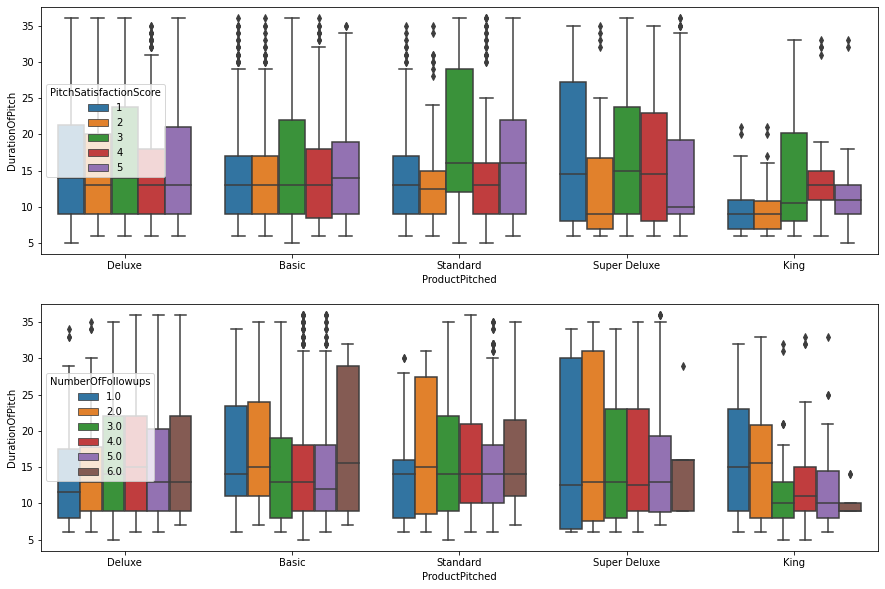

<IPython.core.display.Javascript object>

In [61]:
fig, axes = plt.subplots(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.boxplot(
    data=data,
    x="ProductPitched",
    y="DurationOfPitch",
    hue=data["PitchSatisfactionScore"],
)
plt.subplot(2, 1, 2)
sns.boxplot(
    data=data, x="ProductPitched", y="DurationOfPitch", hue=data["NumberOfFollowups"]
)
plt.show()

* Duration of pitch varies with the Product purchased, Satisfaction score and Number of followups
* Customers purchasing Standard package and averagely satisfied and Super Deluxe package and poorly satisfied have the longest
* The shortest duration of pitch range demostrate customers purchasing King package, even if number of followups is the greatest
* Same for Super Deluxe packages number of followups reversly proportional to duration of pitch

### Preferred Property Star

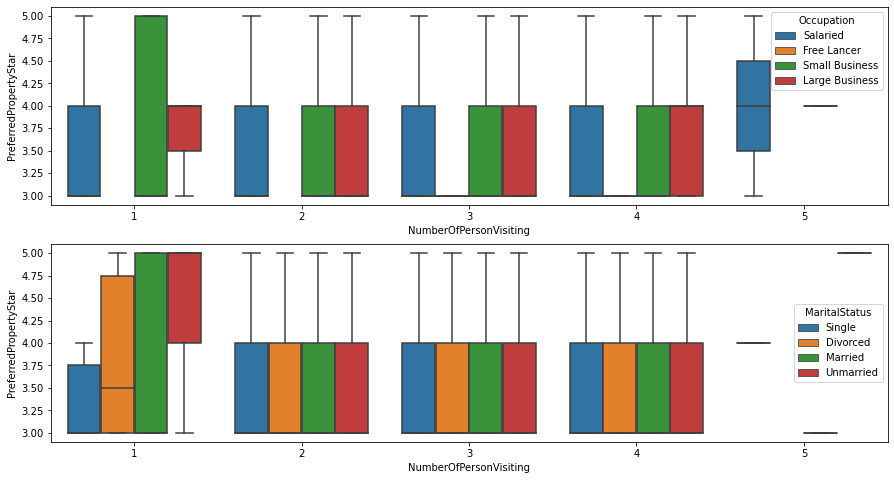

<IPython.core.display.Javascript object>

In [62]:
fig, axes = plt.subplots(figsize=(15, 8))
plt.subplot(2, 1, 1)
sns.boxplot(
    data=data,
    x="NumberOfPersonVisiting",
    y="PreferredPropertyStar",
    hue=data["Occupation"],
)
plt.subplot(2, 1, 2)
sns.boxplot(
    data=data,
    x="NumberOfPersonVisiting",
    y="PreferredPropertyStar",
    hue=data["MaritalStatus"],
)
plt.show()

* Larger groups of 5 comprising of Slaried travellers mostly stay at places with rating 4
* Single solo travellers prefer 3-4 star accomodation, whereas Unmarried travellers make preference towards higher class accomodations

### Number Of Trips

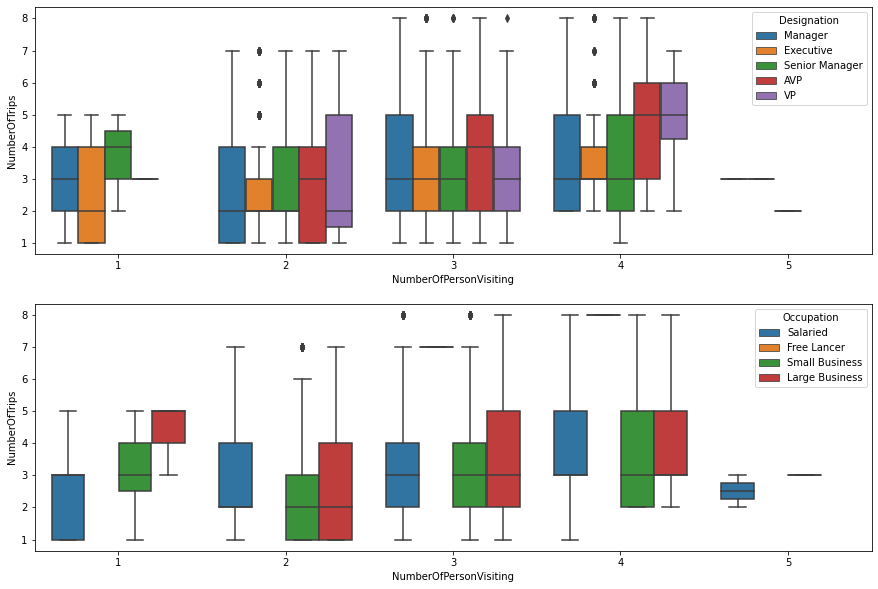

<IPython.core.display.Javascript object>

In [63]:
fig, axes = plt.subplots(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.boxplot(
    data=data, x="NumberOfPersonVisiting", y="NumberOfTrips", hue=data["Designation"]
)
plt.subplot(2, 1, 2)
sns.boxplot(
    data=data, x="NumberOfPersonVisiting", y="NumberOfTrips", hue=data["Occupation"]
)
plt.show()

* AVP customers rearly travel solo and travel more frequent in lafter groups
* Salaried solo travelers make less trips than Small Business and Large Business emloyees
* Large groups of 5 are mostly Salaries cusotomers and make 2-3 trip/year

## Customer Profile based on different packages

##### Product Pitched

<Figure size 720x288 with 0 Axes>

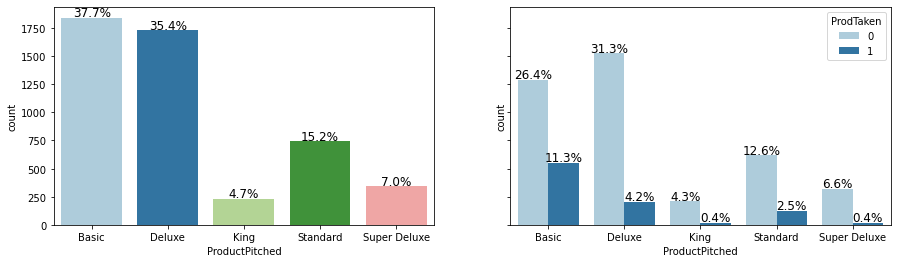

<IPython.core.display.Javascript object>

In [64]:
labeled_barplot(data, "ProductPitched", perc=True)

Customers prefer Basic and Deluxe packages (38 and 35%), Standard (15%), Super Deluxe and King (7 and 5%)
Customers purchasing Basic package are the those mostly interested in the new package as well, followed by Deluxe package holders

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


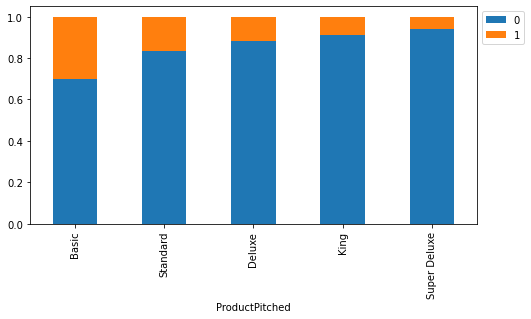

<IPython.core.display.Javascript object>

In [65]:
stacked_barplot(data, "ProductPitched", "ProdTaken")

Customers purchase basic packages have the most ratio of being interested in the new package (almost 30%), followed by standard package purchasers (15%). Super Deluxe pakage customers are least likely to egage in new package (5% of the category)

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

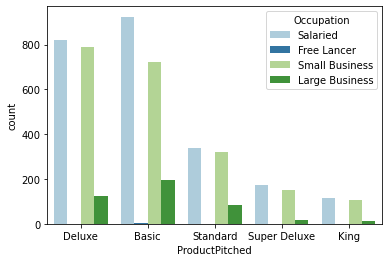

<IPython.core.display.Javascript object>

In [66]:
sns.countplot(data=data, x="ProductPitched", palette="Paired", hue="Occupation")

Basic and Deluxe package customers represent Salaried and Small Business categories. They also are the most active group to buye any packages.

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

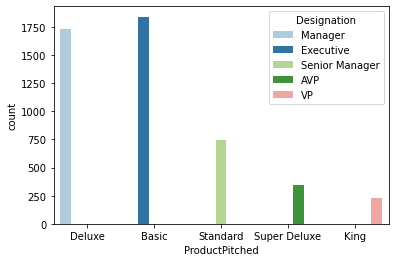

<IPython.core.display.Javascript object>

In [67]:
sns.countplot(data=data, x="ProductPitched", palette="Paired", hue="Designation")

Executive customers prefer Basic packages, Manageres are mostly interested in Deluxe

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

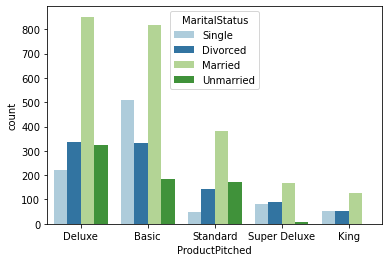

<IPython.core.display.Javascript object>

In [68]:
sns.countplot(data=data, x="ProductPitched", palette="Paired", hue="MaritalStatus")

Basic and Deluxe packages are mainly purchased by Married customers, King and Super Deluxe packages are not popular amongst Unmaried customers

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

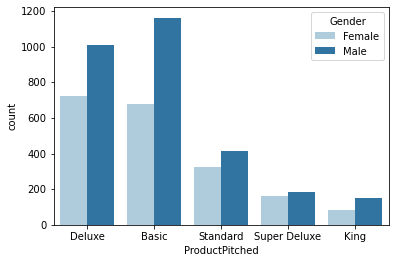

<IPython.core.display.Javascript object>

In [69]:
sns.countplot(data=data, x="ProductPitched", palette="Paired", hue="Gender")

There is no significan gender differentiation on the type of product. Overall Males are most frequent customers regardless of the product type

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

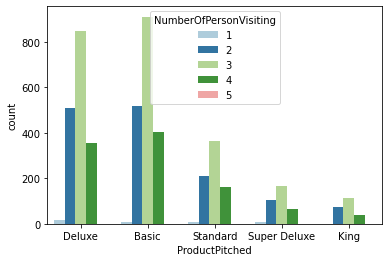

<IPython.core.display.Javascript object>

In [70]:
sns.countplot(
    data=data, x="ProductPitched", palette="Paired", hue="NumberOfPersonVisiting"
)

Medium sized parties of 3 are the most active group puchasing any package, but mostly Basic Deluxe

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

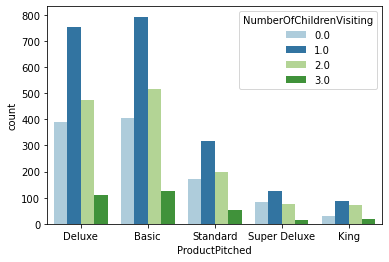

<IPython.core.display.Javascript object>

In [71]:
sns.countplot(
    data=data, x="ProductPitched", palette="Paired", hue="NumberOfChildrenVisiting"
)

Families with 1 child prefer Basic and Deluxe, Families with 3 children rearly purchase Super Deluxe and King packages

<AxesSubplot:xlabel='ProductPitched', ylabel='MonthlyIncome'>

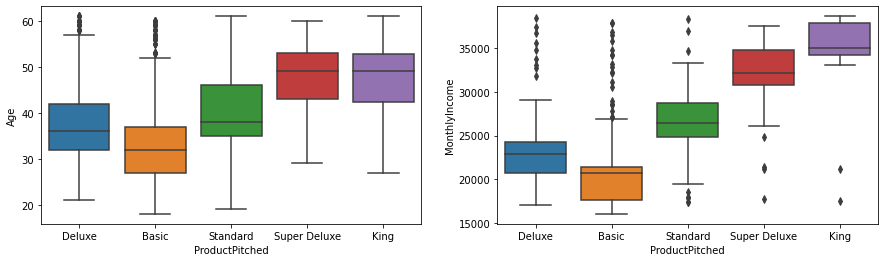

<IPython.core.display.Javascript object>

In [73]:
fig, axes = plt.subplots(figsize=(15, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x="ProductPitched", y="Age")
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x="ProductPitched", y="MonthlyIncome")

* Basic and Deluxe packages are mostly preferred by younger group of customers 30-40 yo and montly income of 17-25 thousand
* Standard package is purchase mostly by group of 36-45 yo and monthly income 25-30 thousand
* Super Deluxe and King packages are favored by older cutomer category of 45+ yo and earning 32-35 thousand/month
* King package is the most expenive and purchase by customers earning 34+ thousand/month

## Summary of EDA


**Data Cleaning:**
* `Gender:` has "Fe Male" entries that need correction to "Female"
* `CustomerID:` does not bring any significant information and can be dropped out
* `MonthlyIncome:` There are obvious outliers over 50000 and less than 10000 that required treatment
* `DurationOfPitch:` There are obvious outliers over 100 that need treatment.
* `NumberOfTrips:` There are 4 data entries with unusually high numbers. We'll consider them as outliers and clip.

**Observations from EDA:**
* `Age:` Customer age varies from 18 to 61yo, normally distributed around 38. Customers purchasing the package are slightly younger in age with mean around 33 and IQR 28-41. Whereas customers not interested in the package tend to have IQR 32-44 (mean of 38). No outliers detected. Age varies with Designation, Occupation and Marital Status. No gender or number of children have dependency with age.  Customers holding VP and AVP positions tend to be older, youngest group is represented by the Executives.  There is a slight variation in IQR for various Occupation and Marital Status groups.
* `MonthlyIncome:` * After removing obvious outliers, variable values outside IQR do not require futher outlier treatment. Income of customers interested in the package also shows slight shift towards lower values with mean around 22 thousand. Variable has a skewed distribution.  Monthly Income distribution has dependecy with Designation, Occupation, Marital Status and Gender. Each Designation has a dedicated IQR range in monthly income distribution.
* Freelancers have the lowest monthly income and hold Executive positions only
* Large Business AVPs tend to have lower income compare to other businesses
* Single customers tend to have lowest monthly income for Managerial positions, however highest for Senior management. Unmarried customers tend to have higher inome as Managers, Executive, however lower in Senior manager and AVP positions. No unmarried customers hold VP designations
* No gender impact on monthly income
* Monthly Income distribution has dependecy with Designation, Occupation, Marital Status and Gender
* Each Designation has a dedicated IQR range in monthly income distribution
* Freelancers have the lowest monthly income and hold Executive positions only
* Large Business AVPs tend to have lower income compare 
* `DurationOfPitch:` After removing entries over 100, no further outlier treatment is required. Customers that ended purchasing a package have longer duration of pitch on average and wider distribution IQR ranging from 10 to 23. Duration of pitch 19-24 will most likely end up with the purchase. Duration of Pitch has a skewed distribution.
* Duration of pitch varies with the Product purchased, Satisfaction score and Number of followups
* Customers purchasing Standard package and averagely satisfied and Super Deluxe package and poorly satisfied have the longest
* The shortest duration of pitch range demostrate customers purchasing King package, even if number of followups is the greatest
* Same for Super Deluxe packages number of followups reversly proportional to duration of pitch
* `Gender:` There is ~60/40 Male/Female customer ratio, number of male customers purchasing the package is higher. Males are as likely to purchase the package as females ratio wise.
* `MaritalStatus:` Majority of cusotmers are married(48%), Divorced and Single display very close numbers of ~19% each, unmarried customers are 14% of the total customer base Single and Married customer numbers purchasing the package are twice the number of other categories. Single customers are the most interested in the package (almost 24%), followed by umarried group with 22% interested. Only around 10% of interest express married and divorced categories.
* `Occupation:` Majority of customers are Salaried emplyees (48%), followed by Small Business (43%) and Large Business (9%). Only two customers are freelancer (0% statistically) Majority of customers purchasing the package are Salaried and Small Business employees (8% of total customer base each).  Customers engaged in large business have have higher percentage rate of buing the package (~24%), Small business and salaried employees are equally probable. Data suggests that freelance customers always purchase the package, however this being only 2 out of 4888 entris, statistically it is not enough to make any certain assumptions.
* `Designation:` Company customer base consists of mainly customers with managerial positions. Executive and Manger (38 and 35% respectively), Senior management 15%, AVP and VP are the least of 7 and 5% respectively. No individual contributor type employees are present in the database. Majority of customers purchasing the package are from Executive group (11%), followed by Manager(4%) and Senior manager(2.5%) positions.  30% of customers holding executive positions are interested in the package, 18% out of senior management, followed by 10% of managers and VP and least of AVP(5%).
* `OwnCar:` Majority of customers own a car (62%). Car ownership does not affect the interest of customers in the package.
* `Passport:` 71% of customers do not hold a passport. Customers holding a valid passport express more interest in the package (~35%) and only 10% of customers without a passport are interested.
* `NumberOfTrips:` Mostly customers make 2-3 trips per year (30% and 22% respecively), once a year make 13% of customers, 4-5 times/year are 9-10% of customers, frequent travellers (6-8 times/year) make 13% of the total number Customers making 2-3 trips per year are the majority bying the package as well. Most frequent travellers (7-8 trips a year) have the highest ratio of inerested customers. Least interest express customers travelling 4-5 times/year.
* AVP customers rearly travel solo and travel more frequent in lafter groups
* Salaried solo travelers make less trips than Small Business and Large Business emloyees
* Large groups of 5 are mostly Salaries cusotomers and make 2-3 trip/year
* `NumberOfPersonVisiting:` Customers prefer travelling in medium sized groups of 3 (majority, 49%), 2 (29%) and 4(21%). Solo travellers and large groups of 5 are of negiligible amount (less than 1%) Customers travelling in groups of 3 are the majority that purchase the package.  According to data collected, single customers and customers in large groups do not purchase the package
* `NumberOfChildrenVisiting:` Families with children travel more than cutomers without children. Families with 1 child are most frequent travellers, followed by families with 2 kids. Families with 3 kids travel the least, only 7% of the total customer number. Families with 1 child comprise the majority of interested in the package.  Number of children in the group has no impact on the interest in the package. 
* `CityTier:` Customers prefer visiting more developed cities (65%) and underdeveloped (31%), cities with average ratings (facilities and living standard) are less attractive (4%). Same applies to customers purchasing the package.  Customers preferring more developed cities are least likely to order the package.
* `PreferredPropertyStar:` Mostly customers prefer 3 star hotels (61%), 4 and 5 star hotels are ~19% of customer base each Customers purchasing the package have analogous distribution.  Luxury travellers are more open to purchasing the package compared to 3star hotel dwellers.
* Larger groups of 5 comprising of Slaried travellers mostly stay at places with rating 4
* Single solo travellers prefer 3-4 star accomodation, whereas Unmarried travellers make preference towards higher class accomodations
* `TypeofContact:` Customers are divided into 2 groups by a way of contact - Self Enquired (71%) and Company Invited(29%). Type of contact does not affect the purchase outcome.
* `ProductPitched:` Customers prefer Basic and Deluxe packages (38 and 35%), Standard (15%), Super Deluxe and King (7 and 5%) Customers purchasing Basic package are the those mostly interested in the new package as well, followed by Deluxe package holders.  Customers purchase basic packages have the most ratio of being interested in the new package (almost 30%), followed by standard package purchasers (15%). Super Deluxe pakage customers are least likely to egage in new package (5% of the category).
* `NumberOfFollowups:` On average customers are followed up 3-4 times, sometimes 5 times is required. Customers with less attention of 1-2 itmes and those required large number of follow-ups are a small portion of the customer base Same distribution applies to customers having the new package.  Higher number of follow-ups icrease chances of customer buying the package.
* `PitchSatisfactionScore:` Customer rate their agent satisfacton on 1-5 scale. Most frequent satisfaction rate is average, #3. However majorly customers are highly statisfied with services (ratings 4-5), ~39%. Unsatisfied customers nevertheless take a significant portion as well, 31% of the total customer base. Customomer satisfaction with the service has direct impact on the probability of purchasing the package.


* Variables generally do not show high dependency
* Highest correlation (0.61) is between Number of persons visiting and number of children visiting, which is excpected
* Age and Monthy Income show correlation of 0.49
* All other variables have correlation less than 40%

**Customer Profile based on different packages**

* Customers prefer Basic and Deluxe packages (38 and 35%), Standard (15%), Super Deluxe and King (7 and 5%)
* Customers purchasing Basic package are the those mostly interested in the new package as well, followed by Deluxe package holders

* Customers purchase basic packages have the most ratio of being interested in the new package (almost 30%), followed by standard package purchasers (15%). Super Deluxe pakage customers are least likely to egage in new package (5% of the category)

* `Occupation` Basic and Deluxe package customers represent Salaried and Small Business categories. They also are the most active group to buye any packages.
* `Designation` Executive customers prefer Basic packages, Mangeres are mostly interested in Deluxe
* `MaritalStatus` Basic and Deluxe packages are mainly purchased by Married customers, King and Super Deluxe packages are not popular amongst Unmaried customersExecutive customers prefer Basic packages, Mangeres are mostly interested in Deluxe???
* `Gender` There is no significan gender differentiation on the type of product. Overall Males are most frequent customers regardless of the product type
* `NumberOfPersonVisiting` Medium sized parties of 3 are the most active group puchasing any package, but mostly Basic Deluxe
* `NumberOfChildrenVisiting` Families with 1 child prefer Basic and Deluxe, Families with 3 children rearly purchase Super Deluxe and King packages
* `Age and Income`
    * Basic and Deluxe packages are mostly preferred by younger group of customers 30-40 yo and montly income of 17-25 thousand
    * Standard package is purchase mostly by group of 36-45 yo and monthly income 25-30 thousand
    * Super Deluxe and King packages are favored by older cutomer category of 45+ yo and earning 32-35 thousand/month
    * King package is the most expenive and purchase by customers earning 34+ thousand/month


# 3. Data pre-processing

## Missing Value Treatment

In [75]:
# Missing data summary
data.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             253
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               144
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               237
dtype: int64

<IPython.core.display.Javascript object>

### Missing Value Treatment - Age
* Age varies with Designation, Occupation and Marital Status
* Age has a normal distribution, mean for each category will be used for imputation

In [76]:
data.groupby(["Designation", "Occupation", "MaritalStatus"])["Age"].mean().sample(5)

Designation     Occupation      MaritalStatus
VP              Salaried        Single           50.857143
Senior Manager  Small Business  Unmarried        39.608696
VP              Small Business  Single           46.250000
Senior Manager  Salaried        Married          39.395349
VP              Small Business  Married          48.055556
Name: Age, dtype: float64

<IPython.core.display.Javascript object>

In [77]:
# Monthly Income has a skewed distribuion, therefore median values for each category will be used
data["Age"] = data.groupby(["Designation", "Occupation", "MaritalStatus"])["Age"].apply(
    lambda x: x.fillna(x.mean())
)
# Checking imputation result
data.Age.isnull().sum()

0

<IPython.core.display.Javascript object>

### Missing Value Treatment - MonthlyIncome

* Monthly Income distribution has dependance on Designation, Occupation, Marital Status and Gender
* Monthly Income has a skewed distribution, median for each category will be used for imputation
* This information can be used for missing value imputation

In [78]:
data.groupby(["Designation", "Occupation", "MaritalStatus"])[
    "MonthlyIncome"
].median().sample(5)

Designation  Occupation      MaritalStatus
VP           Large Business  Divorced         36227.5
AVP          Large Business  Divorced         31835.0
Executive    Large Business  Divorced         20328.0
AVP          Small Business  Unmarried        28341.0
Executive    Salaried        Single           18013.5
Name: MonthlyIncome, dtype: float64

<IPython.core.display.Javascript object>

In [79]:
# Monthly Income has a skewed distribuion, therefore median values for each category will be used
data["MonthlyIncome"] = data.groupby(["Designation", "Occupation", "MaritalStatus"])[
    "MonthlyIncome"
].apply(lambda x: x.fillna(x.median()))
# Checking imputation result
data.MonthlyIncome.isnull().sum()

0

<IPython.core.display.Javascript object>

### Missing Value Treatment - TypeofContact

In [80]:
# Let's look at a few rows where 'TypeofContact' is missing
data[data["TypeofContact"].isnull()].sample(5)

ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
1143          0  45.0           NaN         3              NaN   
2042          0  29.0           NaN         1              NaN   
1469          0  34.0           NaN         1              NaN   
572           0  29.0           NaN         1              NaN   
2049          0  34.0           NaN         1              NaN   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
1143  Small Business    Male                       2                4.0   
2042  Small Business  Female                       3                3.0   
1469  Small Business    Male                       2                1.0   
572   Small Business  Female                       3                3.0   
2049  Small Business  Female                       2                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
1143         Deluxe                    5.0       Married            2.0   
2042         Deluxe                    3.0       Married            5.0   
1469         Deluxe                    3.0       Married            3.0   
572          Deluxe                    3.0      Divorced            5.0   
2049          Basic                    5.0        Single            2.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
1143         0                       3       0                       0.0   
2042         0                       1       0                       1.0   
1469         0                       3       0                       1.0   
572          0                       2       1                       0.0   
2049         0                       1       1                       0.0   

     Designation  MonthlyIncome  
1143     Manager        22984.0  
2042     Manager        22984.0  
1469     Manager        22984.0  
572      Manager        23003.0  
2049   Executive        18262.5

<IPython.core.display.Javascript object>

In [81]:
data["TypeofContact"].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

<IPython.core.display.Javascript object>

In [82]:
# Filling missing values with most occuring value - 'Self Enquiry'
data["TypeofContact"] = data["TypeofContact"].fillna("Self Enquiry")
# Checking imputation result
data.TypeofContact.isnull().sum()

0

<IPython.core.display.Javascript object>

### Missing Value Treatment - DurationOfPitch
* Duration of pitch varies with the Product purchased, Satisfaction score and Number of followups
* Duration of Pitch has a skewed distribution, median will be applied for imputation
* Number of followups contains missing values and will not be used

In [83]:
data.groupby(["ProductPitched", "PitchSatisfactionScore"])[
    "DurationOfPitch"
].median().sample(5)

ProductPitched  PitchSatisfactionScore
Basic           1                         13.0
Standard        3                         16.0
King            4                         13.0
Standard        2                         12.5
Super Deluxe    1                         14.5
Name: DurationOfPitch, dtype: float64

<IPython.core.display.Javascript object>

In [84]:
# Monthly Income has a skewed distribuion, therefore median values for each category will be used
data["DurationOfPitch"] = data.groupby(["ProductPitched", "PitchSatisfactionScore"])[
    "DurationOfPitch"
].apply(lambda x: x.fillna(x.median()))
# Checking imputation result
data.DurationOfPitch.isnull().sum()

0

<IPython.core.display.Javascript object>

### Missing Value Treatment - NumberOfFollowups
Missing values will be imputed based on classes of 'ProductPitched' and 'PitchSatisfactionScore'

In [85]:
data.groupby(["ProductPitched", "PitchSatisfactionScore"])[
    "NumberOfFollowups"
].median().sample(5)

ProductPitched  PitchSatisfactionScore
King            2                         4.0
Standard        4                         4.0
Super Deluxe    2                         3.0
King            3                         4.0
Super Deluxe    5                         4.0
Name: NumberOfFollowups, dtype: float64

<IPython.core.display.Javascript object>

In [86]:
# Monthly Income has a skewed distribuion, therefore median values for each category will be used
data["NumberOfFollowups"] = data.groupby(["ProductPitched", "PitchSatisfactionScore"])[
    "NumberOfFollowups"
].apply(lambda x: x.fillna(x.median()))
# Checking imputation result
data.NumberOfFollowups.isnull().sum()

0

<IPython.core.display.Javascript object>

### Missing Value Treatment - PreferredPropertyStar

In [87]:
# The most logical differentiation was received for 'NumberOfPersonVisiting' and 'Occupation'
data.groupby(["NumberOfPersonVisiting", "Occupation"])["PreferredPropertyStar"].median()

NumberOfPersonVisiting  Occupation    
1                       Large Business    4.0
                        Salaried          3.0
                        Small Business    3.0
2                       Large Business    3.0
                        Salaried          3.0
                        Small Business    3.0
3                       Free Lancer       3.0
                        Large Business    3.0
                        Salaried          3.0
                        Small Business    3.0
4                       Free Lancer       3.0
                        Large Business    4.0
                        Salaried          3.0
                        Small Business    3.0
5                       Salaried          4.0
                        Small Business    4.0
Name: PreferredPropertyStar, dtype: float64

<IPython.core.display.Javascript object>

In [88]:
data["PreferredPropertyStar"] = data.groupby(["NumberOfPersonVisiting", "Occupation"])[
    "PreferredPropertyStar"
].apply(lambda x: x.fillna(x.median()))
# Checking imputation result
data.PreferredPropertyStar.isnull().sum()

0

<IPython.core.display.Javascript object>

### Missing Value Treatment - NumberOfTrips
Nubmer of trips varies depending on Occupation, Designation and Nubmer of persons visiting. We'll use these categories to impute missing values

In [89]:
data.groupby(["NumberOfPersonVisiting", "Designation", "Occupation"])[
    "NumberOfTrips"
].median().sample(5)

NumberOfPersonVisiting  Designation     Occupation    
2                       Senior Manager  Salaried          2.0
                        AVP             Small Business    3.0
4                       VP              Small Business    6.0
2                       Executive       Small Business    2.0
                        AVP             Salaried          2.0
Name: NumberOfTrips, dtype: float64

<IPython.core.display.Javascript object>

In [90]:
data["NumberOfTrips"] = data.groupby(
    ["NumberOfPersonVisiting", "Designation", "Occupation"]
)["NumberOfTrips"].apply(lambda x: x.fillna(x.median()))
# Checking imputation result
data.NumberOfTrips.isnull().sum()

0

<IPython.core.display.Javascript object>

### Missing Value Treatment - NumberOfChildrenVisiting
Best assumption is that missing values occur because no children reported in the party

In [91]:
data["NumberOfChildrenVisiting"] = data["NumberOfChildrenVisiting"].fillna(0)
# Checking imputation result
data.MonthlyIncome.isnull().sum()

0

<IPython.core.display.Javascript object>

In [131]:
# Final check
data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

<IPython.core.display.Javascript object>

All missing values were imputed

## Outlier Detection and treatment
All outliers analysis and treatment has been performed in EDA section

## Converting to "Category"

In [92]:
# Lets convert the columns with an 'object' datatype into categorical variables
for feature in data.columns:  # Loop through all columns in the dataframe
    if (
        data[feature].dtype == "object"
    ):  # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])  # Replace strings with an integer
data.dtypes

ProdTaken                      int64
Age                          float64
TypeofContact               category
CityTier                       int64
DurationOfPitch              float64
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar        float64
MaritalStatus               category
NumberOfTrips                float64
Passport                       int64
PitchSatisfactionScore         int64
OwnCar                         int64
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
dtype: object

<IPython.core.display.Javascript object>

## Data Split, Encoding

In [93]:
# Creating predicting and target sets
X = data.drop(["ProdTaken"], axis=1, inplace=False,)
X = pd.get_dummies(X, drop_first=True)
y = data["ProdTaken"]
X.head(2)

Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  NumberOfFollowups  \
0  41.0         3              6.0                       3                3.0   
1  49.0         1             14.0                       3                4.0   

   PreferredPropertyStar  NumberOfTrips  Passport  PitchSatisfactionScore  \
0                    3.0            1.0         1                       2   
1                    4.0            2.0         0                       3   

   OwnCar  ...  ProductPitched_King  ProductPitched_Standard  \
0       1  ...                    0                        0   
1       1  ...                    0                        0   

   ProductPitched_Super Deluxe  MaritalStatus_Married  MaritalStatus_Single  \
0                            0                      0                     1   
1                            0                      0                     0   

   MaritalStatus_Unmarried  Designation_Executive  Designation_Manager  \
0                        0                      0                    1   
1                        0                      0                    1   

   Designation_Senior Manager  Designation_VP  
0                           0               0  
1                           0               0  

[2 rows x 28 columns]

<IPython.core.display.Javascript object>

In [94]:
# Checking positive/negative product purchase ratio
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

<IPython.core.display.Javascript object>

* Target dataset is imbalanced with 19/81 ratio. Using weighted model will help with data imbalance
* Stratified sampling setting "Stratify" will be used to ensure that relative class frequencies are approximately preserved in train and test sets

In [95]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)
X_train.head()

Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
3878  53.0         3             13.0                       3   
3933  39.0         1              9.0                       3   
3     33.0         1              9.0                       2   
4823  20.0         3             12.0                       4   
4230  50.0         1              7.0                       3   

      NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  \
3878                4.0                    3.0            4.0         0   
3933                4.0                    3.0            7.0         1   
3                   3.0                    3.0            2.0         1   
4823                4.0                    4.0            2.0         1   
4230                5.0                    3.0            2.0         1   

      PitchSatisfactionScore  OwnCar  ...  ProductPitched_King  \
3878                       1       1  ...                    0   
3933                       1       0  ...                    0   
3                          5       1  ...                    0   
4823                       4       1  ...                    0   
4230                       3       0  ...                    0   

      ProductPitched_Standard  ProductPitched_Super Deluxe  \
3878                        0                            0   
3933                        0                            0   
3                           0                            0   
4823                        1                            0   
4230                        0                            1   

      MaritalStatus_Married  MaritalStatus_Single  MaritalStatus_Unmarried  \
3878                      1                     0                        0   
3933                      0                     0                        1   
3                         0                     0                        0   
4823                      0                     0                        1   
4230                      0                     1                        0   

      Designation_Executive  Designation_Manager  Designation_Senior Manager  \
3878                      1                    0                           0   
3933                      1                    0                           0   
3                         1                    0                           0   
4823                      0                    0                           1   
4230                      0                    0                           0   

      Designation_VP  
3878               0  
3933               0  
3                  0  
4823               0  
4230               0  

[5 rows x 28 columns]

<IPython.core.display.Javascript object>

In [96]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print(
    "{0:0.2f}% data is in training set".format((len(X_train) / len(data.index)) * 100)
)
print("{0:0.2f}% data is in test set".format((len(X_test) / len(data.index)) * 100))
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3421, 28)
Shape of test set :  (1467, 28)
69.99% data is in training set
30.01% data is in test set
Percentage of classes in training set:
0    0.817597
1    0.182403
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
0    0.798228
1    0.201772
Name: ProdTaken, dtype: float64


<IPython.core.display.Javascript object>

# 4. Building the Model

## Model evaluation criterion
#### Model can make wrong predictions as:
1. Predicting a customer will buy, but in reality is not interested in the new package
2. Predicting a person will not buy, but in reality was going to buy a new package

#### Which Loss is greater ?
* If we predict a customer is potentially willing to buy a new package, but in reality he was not interested, we waste resources on pitching the customer, loss of resources

* If we predict a customer not is not interested in a new package and we exclude him from pitching process, but in reality he was potentially interested , we lose a potential customer, loss of opportunity

* Company is interested in expanding the customer base in the first place. As previous efforts did not  include any criteria evaluation to target the correct groups, new approach by itself will reduce the cost of pitching, therefore loss of oportunity will be more important, hence we should focus on minimizing False Negatives

#### How to reduce this loss i.e need to reduce False Negatives ?
*  `Recall` should be maximized, the greater the Recall higher the chances of identifying both classes correctly. The approach is the same for any ensemble method

### Let's create functions to calculate various other metrics and confusion matrix so that we don't have to use the same code repeatedly for each model
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot confusion matrix.

In [97]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1}, index=[0]
    )
    return df_perf

<IPython.core.display.Javascript object>

In [98]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Bagging (Decision Tree, Bagging, Random Forest)

### 1. Default Models

#### 1.1 Default Decision Tree with restricted depth
Classes are imbalanced, therefore weights will be used in Decision Tree models. We will restrict max_depth to 15 to refrain from overly overfitted tree

Training performance:
    Accuracy    Recall  Precision        F1
0  0.988308  0.998397   0.941088  0.968896
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.988308  0.998397   0.941088  0.968896


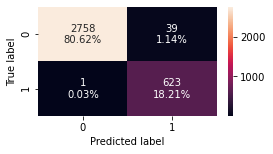

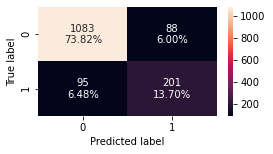

<IPython.core.display.Javascript object>

In [99]:
DTree = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.2, 1: 0.8}, random_state=1, max_depth=15
)
DTree.fit(X_train, y_train)

# Calculating different metrics
DTree_model_train_perf = model_performance_classification_sklearn(
    DTree, X_train, y_train
)
print("Training performance:\n", DTree_model_train_perf)

DTree_model_test_perf = model_performance_classification_sklearn(DTree, X_test, y_test)
print("Testing performance:\n", DTree_model_train_perf)

# Creating confusion matrix
confusion_matrix_sklearn(DTree, X_train, y_train)
confusion_matrix_sklearn(DTree, X_test, y_test)

* The default decision tree is overfitting both training and test data, all metrics are exactly the same and misclassifications are almost none.

##### Visualizing the Decision Tree

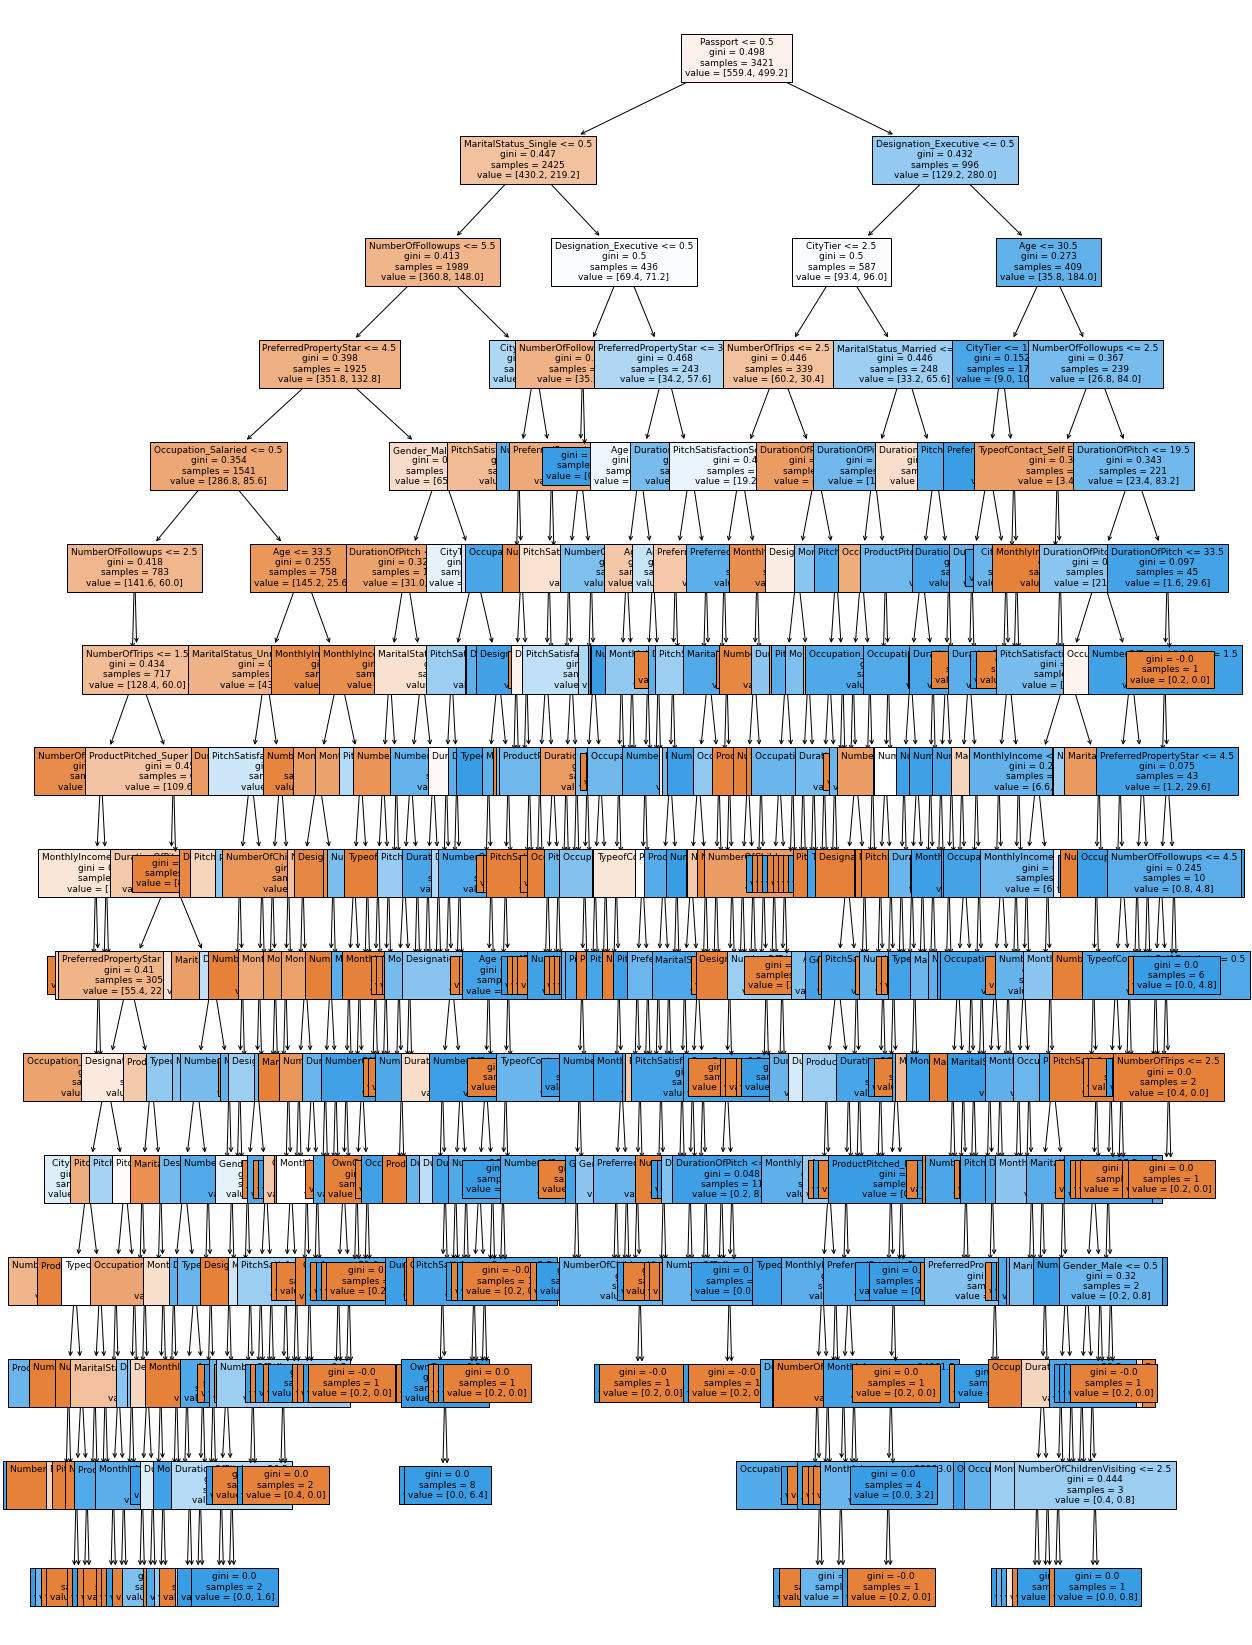

<IPython.core.display.Javascript object>

In [100]:
feature_names = list(X.columns)
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    DTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [101]:
# Text report showing the rules of a decision tree -
print(tree.export_text(DTree, feature_names=feature_names, show_weights=True))

|--- Passport <= 0.50
|   |--- MaritalStatus_Single <= 0.50
|   |   |--- NumberOfFollowups <= 5.50
|   |   |   |--- PreferredPropertyStar <= 4.50
|   |   |   |   |--- Occupation_Salaried <= 0.50
|   |   |   |   |   |--- NumberOfFollowups <= 2.50
|   |   |   |   |   |   |--- weights: [13.20, 0.00] class: 0
|   |   |   |   |   |--- NumberOfFollowups >  2.50
|   |   |   |   |   |   |--- NumberOfTrips <= 1.50
|   |   |   |   |   |   |   |--- NumberOfFollowups <= 4.50
|   |   |   |   |   |   |   |   |--- Age <= 52.50
|   |   |   |   |   |   |   |   |   |--- weights: [16.60, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Age >  52.50
|   |   |   |   |   |   |   |   |   |--- Age <= 53.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.80] class: 1
|   |   |   |   |   |   |   |   |   |--- Age >  53.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [1.20, 0.00] class: 0
|   |   |   |   |   |   |   |--- NumberOfFollowups >  4.50
|   |   |   |   |   |   |   |   |--- Mon

<IPython.core.display.Javascript object>

In [102]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(
    pd.DataFrame(
        DTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
DurationOfPitch              0.141859
Passport                     0.117300
Age                          0.104794
MonthlyIncome                0.073556
PitchSatisfactionScore       0.071811
NumberOfFollowups            0.068664
Designation_Executive        0.067907
NumberOfTrips                0.047890
PreferredPropertyStar        0.047449
CityTier                     0.046894
MaritalStatus_Single         0.024288
MaritalStatus_Unmarried      0.023409
Occupation_Small Business    0.021588
Gender_Male                  0.020431
MaritalStatus_Married        0.017884
TypeofContact_Self Enquiry   0.014857
Occupation_Salaried          0.014817
ProductPitched_Super Deluxe  0.013276
ProductPitched_Deluxe        0.011708
NumberOfChildrenVisiting     0.010272
Designation_Manager          0.010243
Occupation_Large Business    0.010116
NumberOfPersonVisiting       0.007425
OwnCar                       0.005894
Designation_Senior Manager   0.003173
ProductPitch

<IPython.core.display.Javascript object>

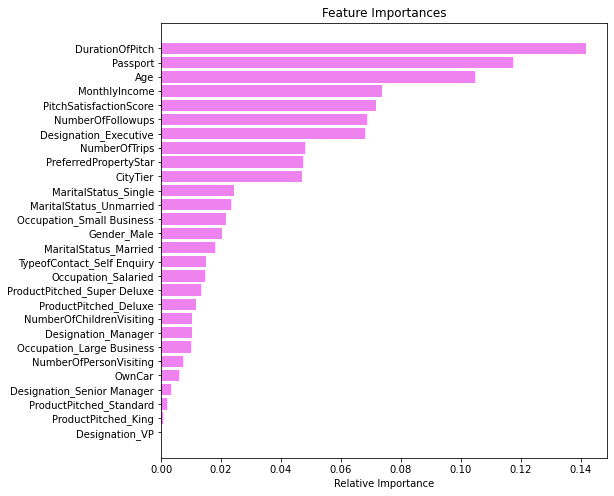

<IPython.core.display.Javascript object>

In [103]:
importances = DTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The default tree is very complex, Duration of Pitch, Passport, Age are three most important features

#### 1.2 Default Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.995615  0.975962        1.0  0.987835
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.907294  0.591216   0.921053  0.720165


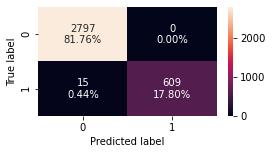

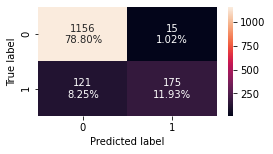

<IPython.core.display.Javascript object>

In [104]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print("Training performance:\n", bagging_classifier_model_train_perf)

bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print("Testing performance:\n", bagging_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

Recalls on train and test data are very different, however F1 score is pretty high. Number of False Negative is much higher than False Positives

#### 1.3 Default Random Forest

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.890934  0.493243   0.935897  0.646018


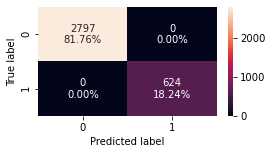

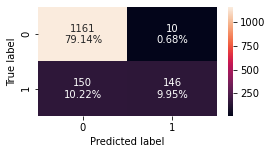

<IPython.core.display.Javascript object>

In [105]:
# Fitting the model
random_forest = RandomForestClassifier(random_state=1, class_weight={0: 0.2, 1: 0.8})
random_forest.fit(X_train, y_train)

# Calculating different metrics
random_forest_model_train_perf = model_performance_classification_sklearn(
    random_forest, X_train, y_train
)
print("Training performance:\n", random_forest_model_train_perf)

random_forest_model_test_perf = model_performance_classification_sklearn(
    random_forest, X_test, y_test
)
print("Testing performance:\n", random_forest_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(random_forest, X_train, y_train)
confusion_matrix_sklearn(random_forest, X_test, y_test)

* Random forest is overfitting the train data, recall of train and test data is very different and number of misclassifications is 0
* Number of False negatives for test set is much higher than false positives

### 2. Hyperparameter Tuning
Let's see if we can improve our models by tuning hyperparameters using GridSearch

#### 2.1 Tuning Decision Tree
Using Recall as a metric

In [106]:
# Choose the type of classifier.
DTree_tuned = DecisionTreeClassifier(random_state=1, class_weight={0: 0.2, 1: 0.8})

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": [6, 8, 10, 12],
    "min_samples_leaf": [2, 4, 6, 8, 10],
    "max_leaf_nodes": [30, 40, 50],
    "min_impurity_decrease": [0.000001, 0.000005, 0.00001],
    "criterion": ["entropy", "gini"],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(DTree_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
DTree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
DTree_tuned.fit(X_train, y_train)

# Print the best parameters
print(grid_obj.best_params_)

{'criterion': 'entropy', 'max_depth': 12, 'max_leaf_nodes': 50, 'min_impurity_decrease': 1e-06, 'min_samples_leaf': 6}


<IPython.core.display.Javascript object>

Training performance 
    Accuracy    Recall  Precision        F1
0   0.76995  0.841346   0.432811  0.571584
Testing performance 
    Accuracy    Recall  Precision       F1
0  0.743013  0.756757    0.42344  0.54303


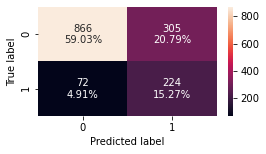

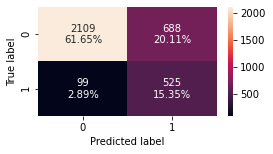

<IPython.core.display.Javascript object>

In [107]:
# Calculating different metrics
DTree_tuned_model_train_perf = model_performance_classification_sklearn(
    DTree_tuned, X_train, y_train
)
DTree_tuned_model_train_perf
print("Training performance \n", DTree_tuned_model_train_perf)

DTree_tuned_model_test_perf = model_performance_classification_sklearn(
    DTree_tuned, X_test, y_test
)
DTree_tuned_model_test_perf
print("Testing performance \n", DTree_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(DTree_tuned, X_test, y_test)
confusion_matrix_sklearn(DTree_tuned, X_train, y_train)

GridSearchCV identified optimal tree depth as 12. Tuned Decision Tree metrics do not show significant overfitting. Recall score 0.84 for train and 0.76 for test, which is quite good result in comparison to the default model. Test False Negative number is only around 2% and is lower than on train data set. However False Positibves are quite high

##### Visualizing the Decision Tree

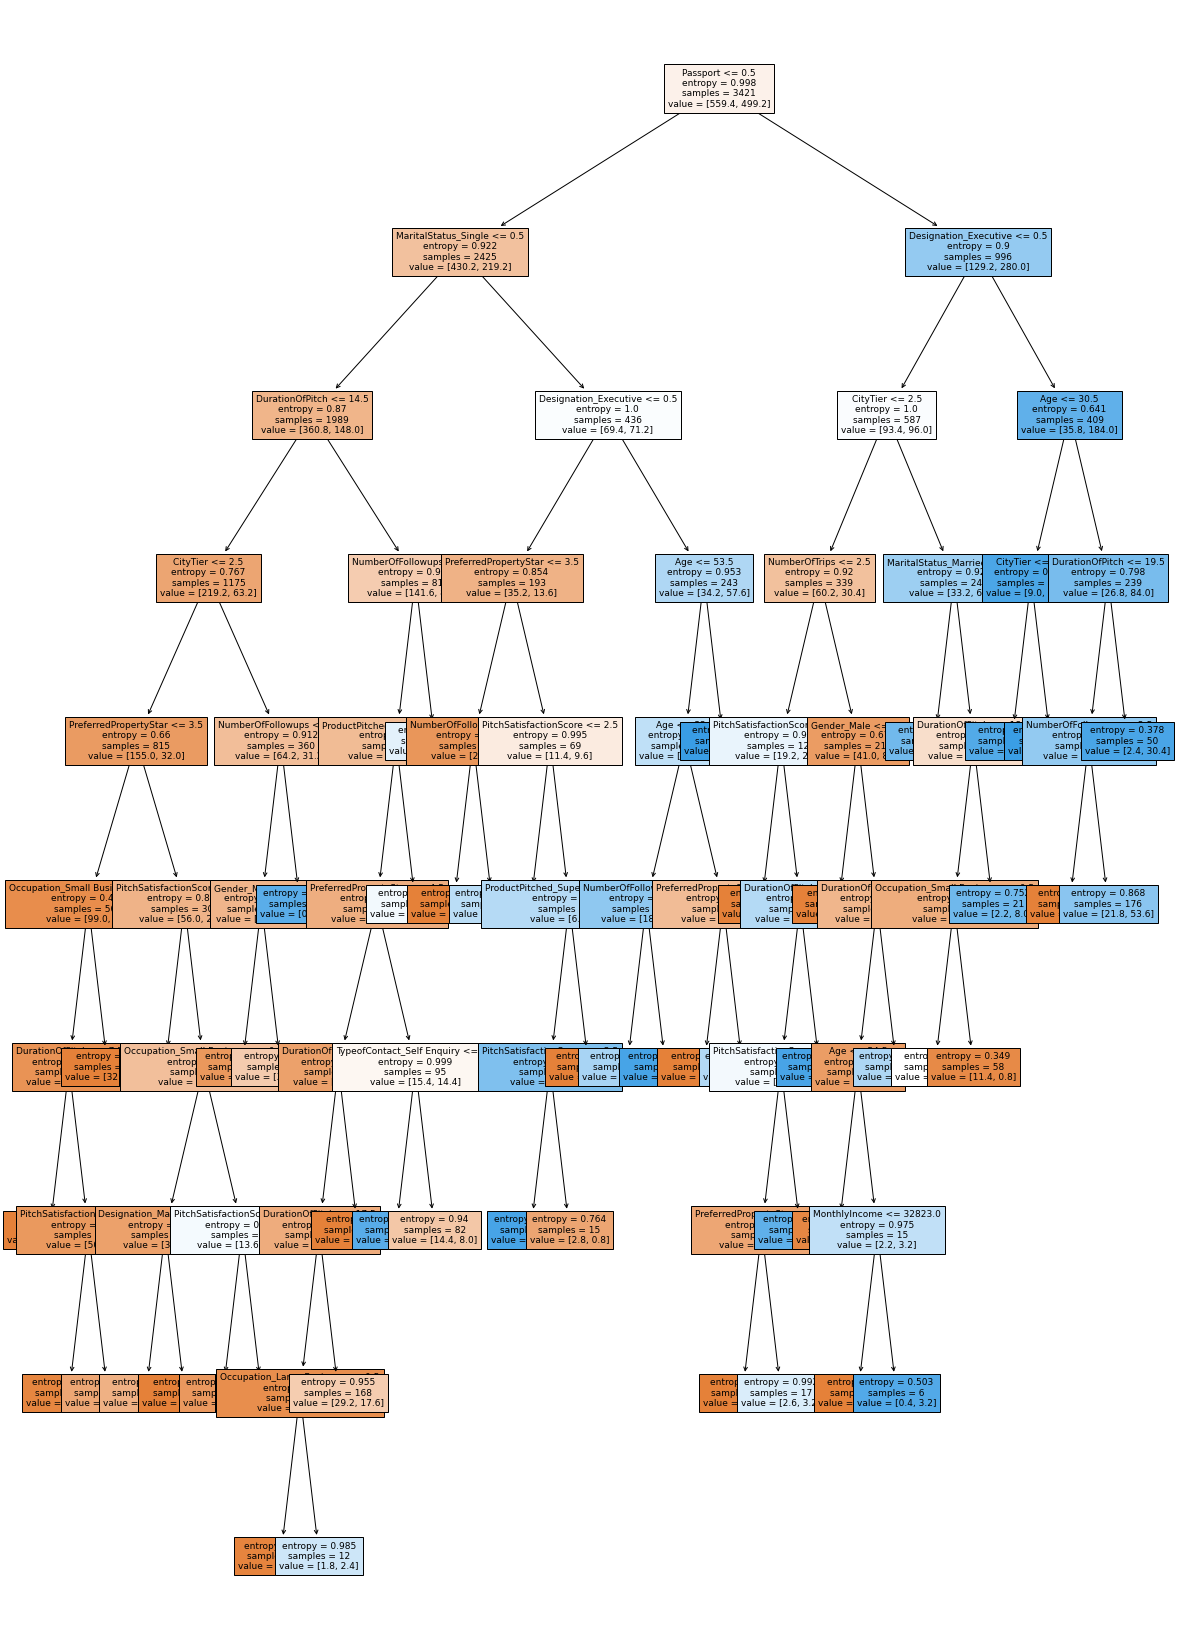

<IPython.core.display.Javascript object>

In [108]:
feature_names = list(X.columns)
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    DTree_tuned,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [109]:
# Text report showing the rules of a decision tree -
print(tree.export_text(DTree_tuned, feature_names=feature_names, show_weights=True))

|--- Passport <= 0.50
|   |--- MaritalStatus_Single <= 0.50
|   |   |--- DurationOfPitch <= 14.50
|   |   |   |--- CityTier <= 2.50
|   |   |   |   |--- PreferredPropertyStar <= 3.50
|   |   |   |   |   |--- Occupation_Small Business <= 0.50
|   |   |   |   |   |   |--- DurationOfPitch <= 7.50
|   |   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |   |--- DurationOfPitch >  7.50
|   |   |   |   |   |   |   |--- PitchSatisfactionScore <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [21.20, 0.80] class: 0
|   |   |   |   |   |   |   |--- PitchSatisfactionScore >  2.50
|   |   |   |   |   |   |   |   |--- weights: [29.60, 8.80] class: 0
|   |   |   |   |   |--- Occupation_Small Business >  0.50
|   |   |   |   |   |   |--- weights: [32.20, 0.00] class: 0
|   |   |   |   |--- PreferredPropertyStar >  3.50
|   |   |   |   |   |--- PitchSatisfactionScore <= 1.50
|   |   |   |   |   |   |--- weights: [10.80, 0.00] class: 0
|   |   |   |   |   |--- PitchSat

<IPython.core.display.Javascript object>

In [110]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(
    pd.DataFrame(
        DTree_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
Passport                     0.208181
Designation_Executive        0.115464
DurationOfPitch              0.112412
PitchSatisfactionScore       0.095660
PreferredPropertyStar        0.079328
NumberOfFollowups            0.069350
Age                          0.058600
CityTier                     0.057633
MaritalStatus_Single         0.037150
Occupation_Small Business    0.033753
Gender_Male                  0.025949
NumberOfTrips                0.021515
MaritalStatus_Married        0.020001
Occupation_Large Business    0.013790
ProductPitched_Standard      0.013152
TypeofContact_Self Enquiry   0.010499
ProductPitched_Super Deluxe  0.009872
Designation_Manager          0.009608
MonthlyIncome                0.008085
Designation_Senior Manager   0.000000
MaritalStatus_Unmarried      0.000000
Occupation_Salaried          0.000000
ProductPitched_King          0.000000
ProductPitched_Deluxe        0.000000
NumberOfChildrenVisiting     0.000000
OwnCar      

<IPython.core.display.Javascript object>

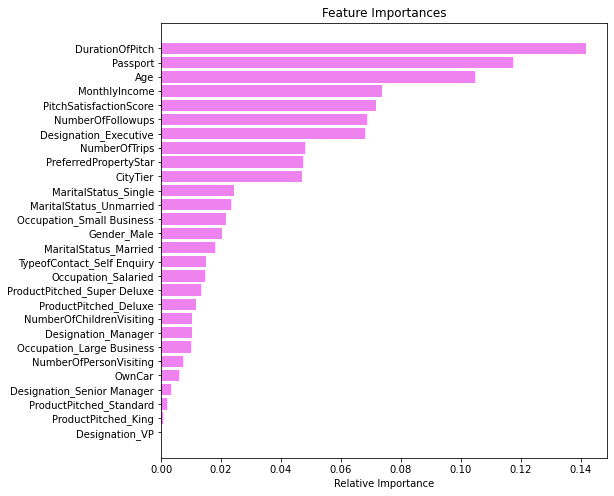

<IPython.core.display.Javascript object>

In [111]:
importances = DTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Tuned Decision Tree feature importance - Duration of Pitch, Passport, Age, Monthly Income and others

#### 2.1 Tuning Bagging Classifier
Using Recall as a metric

In [112]:
# Choose the type of classifier.
bagging_classifier_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.1, 0.4, 0.8, 1, 1.1],
    "max_features": [0.6, 0.7, 0.8, 0.9, 1],
    "n_estimators": [1, 2, 3, 4, 5],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_classifier_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_classifier_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=1,
                  random_state=1)

<IPython.core.display.Javascript object>

Training performance 
    Accuracy    Recall  Precision        F1
0  0.920491  0.804487   0.769939  0.786834
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.813906  0.547297   0.538206  0.542714


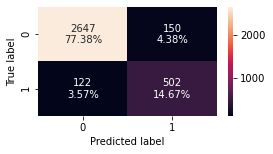

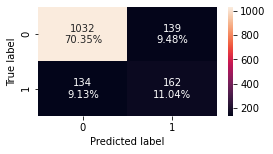

<IPython.core.display.Javascript object>

In [113]:
# Calculating different metrics
bagging_classifier_tuned_train_perf = model_performance_classification_sklearn(
    bagging_classifier_tuned, X_train, y_train
)
# bagging_classifier_tuned_perf_train
print("Training performance \n", bagging_classifier_tuned_train_perf)

bagging_classifier_tuned_test_perf = model_performance_classification_sklearn(
    bagging_classifier_tuned, X_test, y_test
)
# bagging_classifier_tuned_perf_test
print("Testing performance \n", bagging_classifier_tuned_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier_tuned, X_train, y_train)
confusion_matrix_sklearn(bagging_classifier_tuned, X_test, y_test)

Tuned Bagging Classifier is not so much overfitting than default model, however the metrics are slightly lower than default and worse than tuned Decision Tree. Recall on test data decreased to 0.55 and number of false predictions increased

#### 2.1 Tuning Random Forest Classifier
Using Recall as a metric

In [114]:
# Choose the type of classifier.
random_forest_tuned = RandomForestClassifier(
    class_weight={0: 0.2, 1: 0.8}, random_state=1, oob_score=True, bootstrap=True
)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": list(np.arange(1, 20, 5)),
    "n_estimators": [1, 3, 6, 9],
    "min_samples_leaf": np.arange(1, 100, 10),
    "max_features": np.arange(0.1, 1, 0.1),
    #               'min_samples_split': np.arange(2, 20, 5),
    #               "max_samples": np.arange(0.1, 1, 0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(
    random_forest_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1
)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
random_forest_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
random_forest_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=11,
                       max_features=0.7000000000000001, min_samples_leaf=31,
                       n_estimators=1, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.725519  0.759615   0.375297  0.502385
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.717791  0.679054   0.386538  0.492647


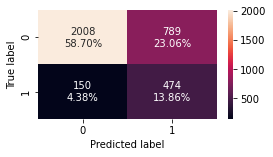

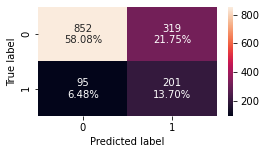

<IPython.core.display.Javascript object>

In [115]:
# Calculating different metrics
random_forest_tuned_model_train_perf = model_performance_classification_sklearn(
    random_forest_tuned, X_train, y_train
)
print("Training performance:\n", random_forest_tuned_model_train_perf)
random_forest_tuned_model_test_perf = model_performance_classification_sklearn(
    random_forest_tuned, X_test, y_test
)
print("Testing performance:\n", random_forest_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(random_forest_tuned, X_train, y_train)
confusion_matrix_sklearn(random_forest_tuned, X_test, y_test)

Tuned Random Forest Classifier does not show signs of overfitting. The Recall has significantly improved compared to the default model

**Summary of the Bagging Ensembling:**

`Default Decision Tree` The default decision tree is overfitting both training and test data, all metrics are exactly the same and misclassifications are almost none.
The default tree is very complex, Duration of Pitch, Passport, Age are three most important features

`Default Bagging Classifier` Recalls on train and test data are very different, however F1 score is pretty high. Number of False Negative is much higher than False Positives

`Default Random Forest` Random forest is overfitting the train data, recall of train and test data is very different and number of misclassifications is 0. 
Number of False negatives for test set is much higher than false positives

`Tuned Decision Tree` GridSearchCV identified optimal tree depth as 12. Tuned Decision Tree metrics do not show significant overfitting. Recall score 0.84 for train and 0.76 for test, which is quite good result in comparison to the default model. Test False Negative number is only around 2% and is lower than on train data set. However False Positibves are quite high. Tuned Decision Tree feature importance - Duration of Pitch, Passport, Age, Monthly Income and others

`Tuned Bagging Classifier` Tuned Bagging Classifier is not so much overfitting than default model, however the metrics are slightly lower than default and worse than tuned Decision Tree. Recall on test data decreased to 0.55 and number of false predictions increased

`Tuned Random Forest` Tuned Random Forest Classifier does not show signs of overfitting. The Recall has significantly improved compared to the default model

## Boosting (AdaBoost, GradientBoost, XGBoost, Stacking classifier)

### 1. Default Models

#### 1.1 AdaBoost

Training performance:
    Accuracy    Recall  Precision        F1
0  0.853552  0.347756   0.697749  0.464171
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.832311  0.304054   0.692308  0.422535


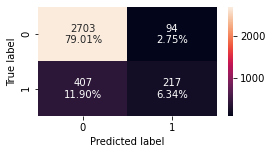

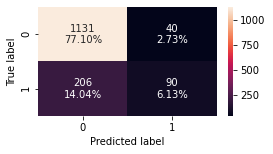

<IPython.core.display.Javascript object>

In [116]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

# Calculating different metrics
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print("Training performance:\n", ab_classifier_model_train_perf)
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print("Testing performance:\n", ab_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_train, y_train)
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

Default Adaboost is giving quite low Recall score, confustion matrix is consistent for train and test data

#### 1.2 Gradient Boost

Training performance:
    Accuracy    Recall  Precision       F1
0  0.885998  0.456731   0.848214  0.59375
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.855487  0.361486   0.823077  0.502347


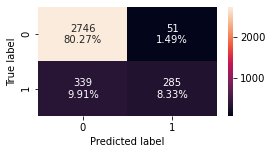

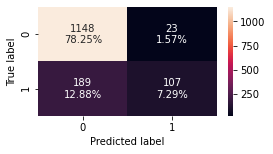

<IPython.core.display.Javascript object>

In [117]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:\n", gb_classifier_model_train_perf)
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance:\n", gb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gb_classifier, X_train, y_train)
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

Default Gradient Boosting classifier demonstrates better metrics than Ada Boost overall and Recall in particular. Confusion matrix show quite high number of False Negatives

#### 1.2 XGBoost

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.925017  0.682432   0.926606  0.785992


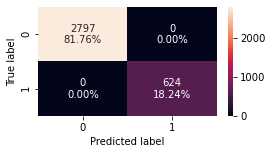

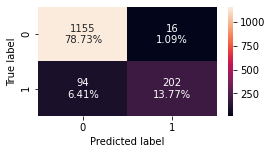

<IPython.core.display.Javascript object>

In [118]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

# Calculating different metrics
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance:\n", xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance:\n", xgb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

* XGBoost classifier is overfitting the training data
* AdaBoost classifier has hghiest Recall score out of 3 models

* Let's try hyperparameter tuning and see if the model performance improves

### 2. Hyperparameter Tuning

#### 2.1 Tuning AdaBoost

In [119]:
# Choose the type of classifier.
ab_classifier_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {  # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(1, 100, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(ab_classifier_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_classifier_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.5000000000000002, n_estimators=81,
                   random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.981292  0.924679    0.97138  0.947455
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.878664  0.621622      0.736  0.673993


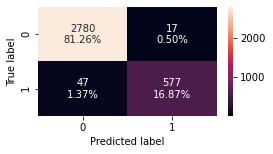

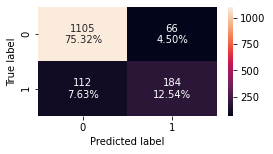

<IPython.core.display.Javascript object>

In [120]:
# Calculating different metrics
ab_classifier_tuned_model_train_perf = model_performance_classification_sklearn(
    ab_classifier_tuned, X_train, y_train
)
print("Training performance:\n", ab_classifier_tuned_model_train_perf)
ab_classifier_tuned_model_test_perf = model_performance_classification_sklearn(
    ab_classifier_tuned, X_test, y_test
)
print("Testing performance:\n", ab_classifier_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier_tuned, X_train, y_train)
confusion_matrix_sklearn(ab_classifier_tuned, X_test, y_test)

- The model is slighlty overfitting
- The model has improved compared to the default version, Recall score almost doubled
- Confusion matrix shows better prediction of potential purchasers of the new package

#### 2.2 Tuning Gradient Boost

In [121]:
# Choose the type of classifier.
gb_classifier_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [200, 300, 400, 500],
    "subsample": [0.2, 0.4, 0.6, 0.8],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)
# scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_classifier_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_classifier_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=500, random_state=1,
                           subsample=0.4)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.959661  0.801282   0.972763  0.878735
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.889571  0.530405   0.872222  0.659664


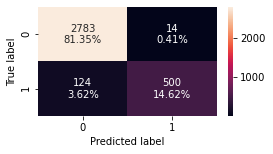

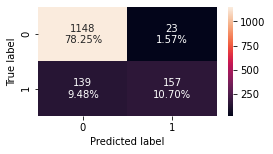

<IPython.core.display.Javascript object>

In [122]:
# Calculating different metrics
gb_classifier_tuned_model_train_perf = model_performance_classification_sklearn(
    gb_classifier_tuned, X_train, y_train
)
print("Training performance:\n", gb_classifier_tuned_model_train_perf)
gb_classifier_tuned_model_test_perf = model_performance_classification_sklearn(
    gb_classifier_tuned, X_test, y_test
)
print("Testing performance:\n", gb_classifier_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gb_classifier_tuned, X_train, y_train)
confusion_matrix_sklearn(gb_classifier_tuned, X_test, y_test)

- The model performace has increased significantly. Recall score for test data increaded to 0.53 from 0.36
- The model overfits the train data in terms of recall
- It is better at identifying customers not interested in the package

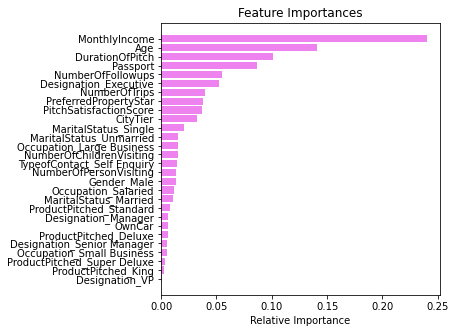

<IPython.core.display.Javascript object>

In [123]:
importances = gb_classifier_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(5, 5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important features are Monthly income, Age and Duration of pitch

#### 2.2 Tuning XGBoost

In [124]:
# Choose the type of classifier.
xgb_classifier_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10, 100, 20),
    "scale_pos_weight": [1, 5, 10],
    #     "subsample":[0.5,0.7,0.9,1],
    "learning_rate": [0.01, 0.1, 0.2, 0.5],
    #     "gamma":[0,1,3],
    #     "colsample_bytree":[0.5,0.7,0.9,1],
    #     "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_classifier_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_classifier_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.779889  0.974359   0.452045  0.617572
Testing performance:
    Accuracy  Recall  Precision        F1
0   0.75801   0.875   0.448873  0.593356


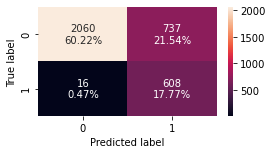

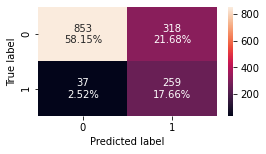

<IPython.core.display.Javascript object>

In [125]:
# Calculating different metrics
xgb_classifier_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier_tuned, X_train, y_train
)
print("Training performance:\n", xgb_classifier_tuned_model_train_perf)
xgb_classifier_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier_tuned, X_test, y_test
)
print("Testing performance:\n", xgb_classifier_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier_tuned, X_train, y_train)
confusion_matrix_sklearn(xgb_classifier_tuned, X_test, y_test)

- Recall has significantly improved from default model from 0.68 to 0.88
- Model predicts customers purchasing the package better than those not interested

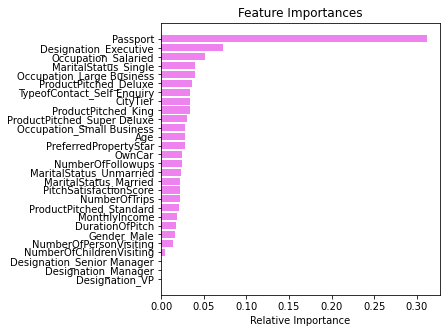

<IPython.core.display.Javascript object>

In [126]:
importances = xgb_classifier_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(5, 5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Most important features are Passport, Executive category from Deignation and Salaried from Occupation. All other feature have very close importance.

### Stacking Model

In [127]:
estimators = [
    ("Random Forest", random_forest_tuned),
    ("Gradient Boosting", gb_classifier_tuned),
    ("Decision Tree", DTree_tuned),
]
final_estimator = xgb_classifier_tuned
stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                                       max_depth=11,
                                                       max_features=0.7000000000000001,
                                                       min_samples_leaf=31,
                                                       n_estimators=1,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           n_estimators=500,
                                         

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0   0.84449  0.935897   0.542751  0.687059
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.790048  0.790541     0.4875  0.603093


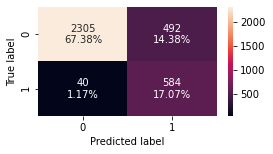

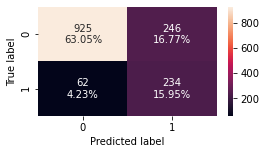

<IPython.core.display.Javascript object>

In [128]:
# Calculating different metrics
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
print("Training performance:\n", stacking_classifier_model_train_perf)

stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
print("Testing performance:\n", stacking_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

* The stacking classifier gives slightly worse performance as compared to XGBoost.
* Confusion matrix shows that the model can identify the majority of potential customers and is better than identifying customers not interested in the new package

## Comparing all models

In [129]:
# Or using concat
# training performance comparison
models_train_comp_df = pd.concat(
    [
        DTree_model_train_perf.T,
        DTree_tuned_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_classifier_tuned_train_perf.T,
        random_forest_model_train_perf.T,
        random_forest_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        ab_classifier_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gb_classifier_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_classifier_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Classifier Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost",
    "Adaboost Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Classifier",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree  Decision Tree Tuned  Bagging Classifier  \
Accuracy        0.988308             0.769950            0.995615   
Recall          0.998397             0.841346            0.975962   
Precision       0.941088             0.432811            1.000000   
F1              0.968896             0.571584            0.987835   

           Bagging Classifier Tuned  Random Forest Estimator  \
Accuracy                   0.920491                      1.0   
Recall                     0.804487                      1.0   
Precision                  0.769939                      1.0   
F1                         0.786834                      1.0   

           Random Forest Tuned  Adaboost  Adaboost Tuned  Gradient Boost  \
Accuracy              0.725519  0.853552        0.981292        0.885998   
Recall                0.759615  0.347756        0.924679        0.456731   
Precision             0.375297  0.697749        0.971380        0.848214   
F1                    0.502385  0.464171        0.947455        0.593750   

           Gradient Boost Tuned  XGB  XGB Tuned  Stacking Classifier  
Accuracy               0.959661  1.0   0.779889             0.844490  
Recall                 0.801282  1.0   0.974359             0.935897  
Precision              0.972763  1.0   0.452045             0.542751  
F1                     0.878735  1.0   0.617572             0.687059

<IPython.core.display.Javascript object>

In [132]:
# Or using concat
# training performance comparison
models_train_comp_df = pd.concat(
    [
        DTree_model_test_perf.T,
        DTree_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_classifier_tuned_test_perf.T,
        random_forest_model_train_perf.T,
        random_forest_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        ab_classifier_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gb_classifier_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_classifier_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Classifier Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost",
    "Adaboost Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Classifier",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree  Decision Tree Tuned  Bagging Classifier  \
Accuracy        0.875256             0.743013            0.907294   
Recall          0.679054             0.756757            0.591216   
Precision       0.695502             0.423440            0.921053   
F1              0.687179             0.543030            0.720165   

           Bagging Classifier Tuned  Random Forest Estimator  \
Accuracy                   0.813906                      1.0   
Recall                     0.547297                      1.0   
Precision                  0.538206                      1.0   
F1                         0.542714                      1.0   

           Random Forest Tuned  Adaboost  Adaboost Tuned  Gradient Boost  \
Accuracy              0.717791  0.832311        0.878664        0.855487   
Recall                0.679054  0.304054        0.621622        0.361486   
Precision             0.386538  0.692308        0.736000        0.823077   
F1                    0.492647  0.422535        0.673993        0.502347   

           Gradient Boost Tuned       XGB  XGB Tuned  Stacking Classifier  
Accuracy               0.889571  0.925017   0.758010             0.790048  
Recall                 0.530405  0.682432   0.875000             0.790541  
Precision              0.872222  0.926606   0.448873             0.487500  
F1                     0.659664  0.785992   0.593356             0.603093

<IPython.core.display.Javascript object>

In terms of Recall the best model is Tuned XGBoost with Recall 0.88.
The top 3 models are Tuned XGBoost, Stacking Classifier and Tuned Decisision Tree

**Summary of the Boosting Ensembling:**

`Default AdaBoost` Default Adaboost is giving quite low Recall score, confustion matrix is consistent for train and test data

`Default Gradient Boost` Default Gradient Boosting classifier demonstrates better metrics than Ada Boost overall and Recall in particular. Confusion matrix show quite high number of False Negatives

`Default XGBoost` XGBoost classifier is overfitting the training data. AdaBoost classifier has hghiest Recall score out of 3 models

`Tuned AdaBoost` The model is slighlty overfitting. The model has improved compared to the default version, Recall score almost doubled. Confusion matrix shows better prediction of potential purchasers of the new package

`Tuned Gradient Boost` The model performace has increased significantly. Recall score for test data increaded to 0.53 from 0.36. The model overfits the train data in terms of recall. It is better at identifying customers not interested in the package. The most important features are Monthly income, Age and Duration of pitch

`Tuned XGBoost` Recall has significantly improved from default model from 0.68 to 0.88. Model predicts customers purchasing the package better than those not interested. Most important features are Passport, Executive category from Deignation. All other feature have very close importance

`Stacking Model` The stacking classifier gives slightly worse performance as compared to XGBoost. Confusion matrix shows that the model can identify the majority of potential customers and is better than identifying customers not interested in the new package

# Actionable Insights and Recommendations

* The best model in terms of Recall is Tuned XGBoost with Recall 0.88.
* The top 3 models are Tuned XGBoost, Stacking Classifier and Tuned Decisision Tree.
* However if company will start looking to minimize the expenses furhter, the F1 score will be most appropriate metric and best model distribution will change towards XGB, Bagging Classifier and Adaboost

**Based on our analysis we can make the following recommendations**

* Majority of customer have preference towards more basic packages like Basic and Deluxe, so the company should continue to spend their efforts on pitching these products
* At the same time they are more open at exploring new package offerings and will be interested in the new package
* These are primarily Salaried and Small Business representatives of younger ages 30-40 years with income around 17-25 thousands. They are very active at buying all package umbrella
* Married customers are a very active customer group and small families with one child falls in that category.
* Gender does not have an impact on the interest in the new package, however generally Males being more frequent customers of the company
* Customers of more luxurious and expensive packages do not tend to change their style of travelling easy
* Executive customers turned out to prefer Basic packages, whereas Mangeres are mostly interested in Deluxe
* To increase the sales of more expensive package like Super Deluxe and King company should focus on attracting older cutomer category of 45+ yo and earning 32+ thousand/month. Perhaps having upgrades to Wellness Package with more luxurious options will attract these customers to new offerings